In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
from plotly.io import write_html
import plotly.graph_objects as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

In [130]:
colorscale = [
    [0, 'rgb(244, 164, 96)'],
    [0.5, 'white'],
    [1, '#4682B4']
]
colorscale2 = [
    [0, 'rgba(255, 165, 0,0.8)'],
    [0.5, 'white'],
    [1, 'rgba(50,50,100,0.8)']
] 
colorscale3 = [
    [0, 'rgba(50,50,100,0.8)'],
    [0.5, 'white'],
    [1, 'rgba(255, 165, 0,0.8)']
] 

In [3]:
master = pd.read_csv('master.csv')
master

,Unnamed: 0,Year,State,Replacement Ratio 1,Replacement Ratio 2,Recipiency Rate,Average WBA,Minimum WBA,Maximum WBA,Average Weekly Wage,...,"Real Maximum WBA (regional, 2000 base)","Real Average WBA (state, 2000 base)","Real Minimum WBA (state, 2000 base)","Real Maximum WBA (state, 2000 base)","Real Average WBA (regional, 2023 base)","Real Minimum WBA (regional, 2023 base)","Real Maximum WBA (regional, 2023 base)","Real Average WBA (state, 2017 base)","Real Minimum WBA (state, 2017 base)","Real Maximum WBA (state, 2017 base)"
0,0,2000,AK,0.308,0.281,0.608800,168.56,44.0,248.0,599.99,...,248.00,168.56,44.0,248.0,312.27,81.51,459.44,256.15,66.86,376.87
1,1,2000,AL,0.434,0.383,0.292086,164.13,45.0,190.0,428.77,...,190.00,164.13,45.0,190.0,290.98,79.78,336.84,239.25,65.60,276.96
2,2,2000,AR,0.523,0.488,0.453458,211.50,55.0,309.0,433.26,...,309.00,211.50,55.0,309.0,374.96,97.51,547.81,274.67,71.43,401.30
3,3,2000,AZ,0.463,0.385,0.205709,176.33,40.0,205.0,458.32,...,205.00,NaN,NaN,NaN,326.67,74.10,379.78,NaN,NaN,NaN
4,4,2000,CA,0.383,0.310,0.409791,163.65,40.0,230.0,528.25,...,230.00,163.65,40.0,230.0,303.18,74.10,426.10,246.90,60.35,347.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,1241,2023,VT,0.531,0.476,0.405788,496.00,80.0,668.0,1042.34,...,381.91,NaN,NaN,NaN,496.00,80.00,668.00,NaN,NaN,NaN
1242,1242,2023,WA,0.494,0.436,0.311163,710.91,317.0,999.0,1631.39,...,539.24,NaN,NaN,NaN,710.91,317.00,999.00,NaN,NaN,NaN
1243,1243,2023,WI,0.374,0.325,0.287291,342.65,54.0,370.0,1053.13,...,220.23,NaN,NaN,NaN,342.65,54.00,370.00,NaN,NaN,NaN
1244,1244,2023,WV,0.442,0.419,0.238561,401.43,24.0,630.0,957.72,...,355.36,NaN,NaN,NaN,401.43,24.00,630.00,NaN,NaN,NaN


In [305]:
master[master['State'] == 'CA'][['Year', 'Annual Regional CPI-U']]

,Year,Annual Regional CPI-U
4,2000,174.800
56,2001,181.200
107,2002,184.700
159,2003,188.600
211,2004,193.000
263,2005,198.900
315,2006,205.700
367,2007,212.230
419,2008,219.646
471,2009,218.822


## Figure 1a/1b: Number of Years from 2003-2023 with Increase in Nominal Min/Max WBA

In [30]:
master_trim = master[master['Year'] >= 2003]
master_trim

,Unnamed: 0,Year,State,Replacement Ratio 1,Replacement Ratio 2,Recipiency Rate,Average WBA,Minimum WBA,Maximum WBA,Average Weekly Wage,...,"Real Maximum WBA (regional, 2000 base)","Real Average WBA (state, 2000 base)","Real Minimum WBA (state, 2000 base)","Real Maximum WBA (state, 2000 base)","Real Average WBA (regional, 2023 base)","Real Minimum WBA (regional, 2023 base)","Real Maximum WBA (regional, 2023 base)","Real Average WBA (state, 2017 base)","Real Minimum WBA (state, 2017 base)","Real Maximum WBA (state, 2017 base)"
155,155,2003,AK,0.308,0.274,0.558523,177.03,44.0,248.0,645.32,...,229.85,167.81,41.71,235.09,303.97,75.55,425.83,255.01,63.38,357.25
156,156,2003,AL,0.422,0.379,0.307436,180.19,45.0,210.0,474.86,...,198.04,166.35,41.54,193.87,301.25,75.23,351.09,242.48,60.56,282.60
157,157,2003,AR,0.512,0.498,0.471322,228.27,62.0,345.0,458.49,...,325.35,212.68,57.77,321.44,381.64,103.66,576.79,276.21,75.02,417.46
158,158,2003,AZ,0.406,0.328,0.302321,187.71,40.0,205.0,572.38,...,190.00,NaN,NaN,NaN,322.31,68.68,351.99,NaN,NaN,NaN
159,159,2003,CA,0.447,0.371,0.446838,255.88,40.0,370.0,690.17,...,342.93,232.07,36.28,335.58,439.36,68.68,635.31,350.14,54.73,506.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,1241,2023,VT,0.531,0.476,0.405788,496.00,80.0,668.0,1042.34,...,381.91,NaN,NaN,NaN,496.00,80.00,668.00,NaN,NaN,NaN
1242,1242,2023,WA,0.494,0.436,0.311163,710.91,317.0,999.0,1631.39,...,539.24,NaN,NaN,NaN,710.91,317.00,999.00,NaN,NaN,NaN
1243,1243,2023,WI,0.374,0.325,0.287291,342.65,54.0,370.0,1053.13,...,220.23,NaN,NaN,NaN,342.65,54.00,370.00,NaN,NaN,NaN
1244,1244,2023,WV,0.442,0.419,0.238561,401.43,24.0,630.0,957.72,...,355.36,NaN,NaN,NaN,401.43,24.00,630.00,NaN,NaN,NaN


In [31]:
nominal_inc_maxwba = master_trim.groupby("State")[['Maximum WBA']].apply("nunique")
nominal_inc_maxwba = nominal_inc_maxwba.reset_index()
nominal_inc_maxwba['Maximum WBA'] = nominal_inc_maxwba['Maximum WBA'] - 1
nominal_inc_maxwba = nominal_inc_maxwba.rename(columns={'Maximum WBA': "Number of Years"})
#nominal_inc_maxwba

In [32]:
bins = [-0.1, 0, 5, 10, 15, 20]
labels = ['0', '1-5', '6-10', '11-15', '15-20']
nominal_inc_maxwba['Number of Years'] = pd.cut(nominal_inc_maxwba['Number of Years'], bins=bins, labels=labels, include_lowest=True)

In [40]:
color_map = {
    '0': 'rgba(255, 15, 0,0.8)',       # red
    '1-5': '#fdae6b',
    '6-10': '#fee6ce',
    '11-15': '#deebf7',
    '15-20': 'rgba(50,50,100,0.8)'    # blue
}

In [41]:
# Define custom order of labels
category_order = ["0", "1-5", "6-10", "11-15", "15-20"]

# Convert the column to a categorical type with the specified order
nominal_inc_maxwba["Number of Years"] = pd.Categorical(nominal_inc_maxwba["Number of Years"], categories=category_order, ordered=True)

In [262]:
len(nominal_inc_maxwba[(nominal_inc_maxwba['Number of Years'] == '1-5') | (nominal_inc_maxwba['Number of Years'] == '0')]), len(nominal_inc_minwba[(nominal_inc_minwba['Number of Years'] == '1-5') | (nominal_inc_minwba['Number of Years'] == '0')])

(19, 31)

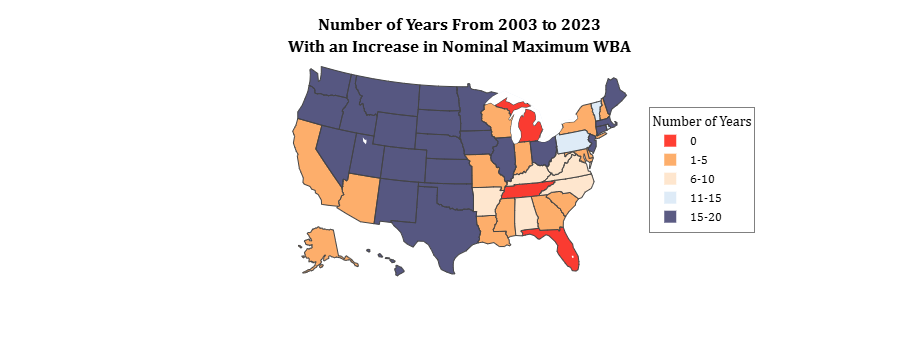

In [42]:
fig = px.choropleth(
    data_frame=nominal_inc_maxwba,
    locations='State',               
    locationmode='USA-states',       
    color='Number of Years',
    color_discrete_map=color_map,
    scope='usa',
    labels={'Year Bucket': 'Year Bucket'},
    category_orders={"Number of Years": category_order}
)

fig.update_layout(
    title={
        'text': "<b>Number of Years From 2003 to 2023<br>With an Increase in Nominal Maximum WBA</b>",
        'x': 0.5, 
        'xanchor': 'center'
    },
    font=dict(
        family="Cambria",  
        size=12,         
        color="black",
    ),
        legend=dict(
        x=0.75,     # move left/right (closer = smaller)
        y=0.5,      # vertical position
        xanchor='left',
        yanchor='middle',
        bgcolor='rgba(255,255,255,0.8)',
        bordercolor='gray',
        borderwidth=1
    )
)

fig.show()

In [44]:
write_html(fig, 'fig_1a.html')

In [45]:
nominal_inc_minwba = master_trim.groupby("State")[['Minimum WBA']].apply("nunique")
nominal_inc_minwba = nominal_inc_minwba.reset_index()
nominal_inc_minwba['Minimum WBA'] = nominal_inc_minwba['Minimum WBA'] - 1
nominal_inc_minwba = nominal_inc_minwba.rename(columns={'Minimum WBA': "Number of Years"})
#nominal_inc_minwba

bins = [-0.1, 0, 5, 10, 15, 20]
labels = ['0', '1-5', '6-10', '11-15', '15-20']
nominal_inc_minwba['Number of Years'] = pd.cut(nominal_inc_minwba['Number of Years'], bins=bins, labels=labels, include_lowest=True)

# Define custom order of labels
category_order = ["0", "1-5", "6-10", "11-15", "15-20"]

# Convert the column to a categorical type with the specified order
nominal_inc_minwba["Number of Years"] = pd.Categorical(nominal_inc_minwba["Number of Years"], categories=category_order, ordered=True)

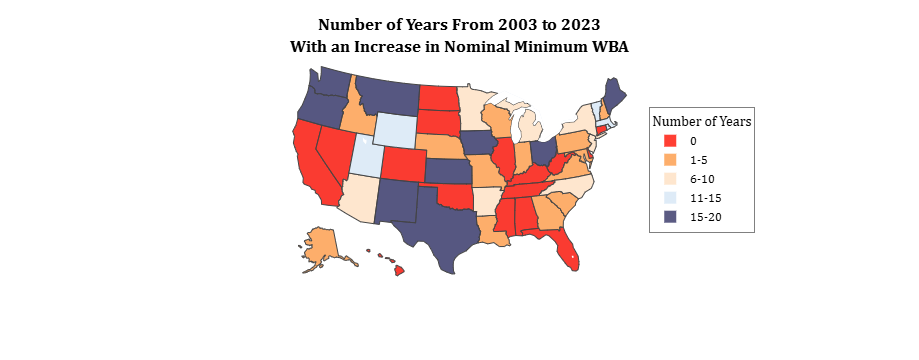

In [46]:
fig = px.choropleth(
    data_frame=nominal_inc_minwba,
    locations='State',               
    locationmode='USA-states',       
    color='Number of Years',
    color_discrete_map=color_map,
    scope='usa',
    labels={'Year Bucket': 'Year Bucket'},
    category_orders={"Number of Years": category_order}
)                    

fig.update_layout(
    title={
        'text': "<b>Number of Years From 2003 to 2023<br>With an Increase in Nominal Minimum WBA</b>",
        'x': 0.5, 
        'xanchor': 'center'
    },
    font=dict(
        family="Cambria",  
        size=12,         
        color="black",
    ),
    legend=dict(
        x=0.75,     # move left/right (closer = smaller)
        y=0.5,      # vertical position
        xanchor='left',
        yanchor='middle',
        bgcolor='rgba(255,255,255,0.8)',
        bordercolor='gray',
        borderwidth=1
    )
)

fig.show()

In [47]:
write_html(fig, "fig_1b.html")

## Figure 2: Trends in Average and Max Real WBA over 2000-2023 in California, state/region-adjusted

In [13]:
master_trim.columns

Index(['Unnamed: 0', 'Year', 'State', 'Replacement Ratio 1',
       'Replacement Ratio 2', 'Recipiency Rate', 'Average WBA', 'Minimum WBA',
       'Maximum WBA', 'Average Weekly Wage', 'Region', 'Annual Regional CPI-U',
       'Annualized State Inflation Rate', 'MET',
       'Real Average WBA (regional, 2000 base)',
       'Real Minimum WBA (regional, 2000 base)',
       'Real Maximum WBA (regional, 2000 base)',
       'Real Average WBA (state, 2000 base)',
       'Real Minimum WBA (state, 2000 base)',
       'Real Maximum WBA (state, 2000 base)',
       'Real Average WBA (regional, 2023 base)',
       'Real Minimum WBA (regional, 2023 base)',
       'Real Maximum WBA (regional, 2023 base)',
       'Real Average WBA (state, 2017 base)',
       'Real Minimum WBA (state, 2017 base)',
       'Real Maximum WBA (state, 2017 base)'],
      dtype='object')

In [356]:
a = master_trim[master_trim['Year'] == 2023]['Recipiency Rate'] 
b = master_trim[master_trim['Year'] == 2003]['Recipiency Rate']
c = np.array(a) - np.array(b)
len(c[c<-0.15])

19

In [333]:
recipiency = master_trim.groupby('Year')[['Recipiency Rate']].aggregate('mean')
recipiency = recipiency.reset_index()

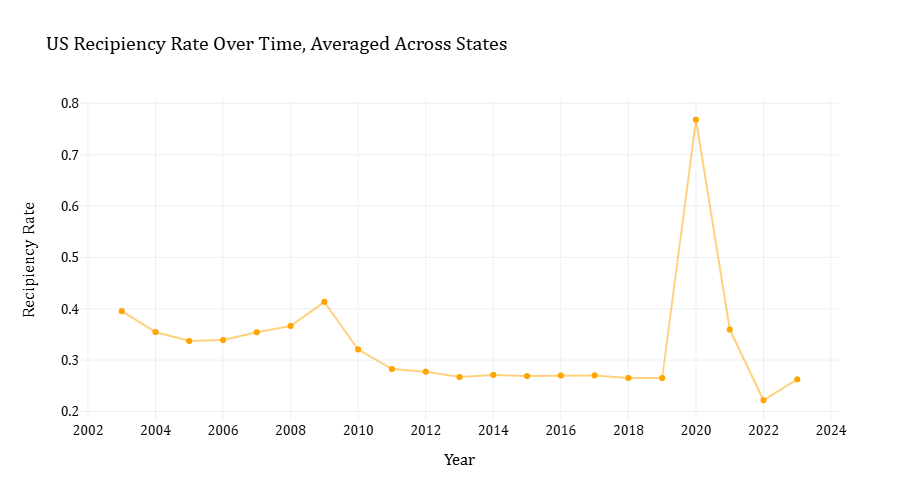

In [336]:
pio.templates.default = 'plotly_white'

fig1 = px.line(
             x = recipiency['Year'], 
             y = recipiency['Recipiency Rate']
              )
fig1.update_traces(line=dict(color = 'rgba(255, 165, 0,0.5)'))

fig2 = px.scatter(
                x = recipiency['Year'], 
                y = recipiency['Recipiency Rate'],
                color_discrete_sequence=['rgba(255, 165, 0,1)'])

fig1 = go.Figure(data=fig1.data + fig2.data )
fig1.update_layout(title_text="US Recipiency Rate Over Time, Averaged Across States",
                   xaxis_title="Year", yaxis_title="Recipiency Rate",
                   height =500,
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    ),
                   xaxis=dict(
                        tickmode='linear',   
                        tick0=2000,          
                        dtick=2              
                    ),
                   yaxis=dict(
                        tick0=0,          
                        dtick=0.1 
                    ),
                   legend=dict(
                        orientation="v",     
                        x=1.1,
                        xanchor="center",
                        y=0.8
                    )
                  )
fig1.show()

In [370]:
master_trim[(master_trim['State'] == "CA")]

,Unnamed: 0,Year,State,Replacement Ratio 1,Replacement Ratio 2,Recipiency Rate,Average WBA,Minimum WBA,Maximum WBA,Average Weekly Wage,...,"Real Maximum WBA (regional, 2000 base)","Real Average WBA (state, 2000 base)","Real Minimum WBA (state, 2000 base)","Real Maximum WBA (state, 2000 base)","Real Average WBA (regional, 2023 base)","Real Minimum WBA (regional, 2023 base)","Real Maximum WBA (regional, 2023 base)","Real Average WBA (state, 2017 base)","Real Minimum WBA (state, 2017 base)","Real Maximum WBA (state, 2017 base)"
159,159,2003,CA,0.447,0.371,0.446838,255.88,40.0,370.0,690.17,...,342.93,232.07,36.28,335.58,439.36,68.68,635.31,350.14,54.73,506.29
211,211,2004,CA,0.485,0.417,0.395734,266.72,40.0,410.0,639.46,...,371.34,235.33,35.29,361.75,447.53,67.12,687.94,355.05,53.25,545.78
263,263,2005,CA,0.488,0.396,0.384043,288.56,40.0,450.0,728.51,...,395.48,250.10,34.67,390.03,469.81,65.12,732.66,377.34,52.31,588.45
315,315,2006,CA,0.504,0.414,0.394716,296.48,40.0,450.0,716.23,...,382.40,248.20,33.49,376.72,466.75,62.97,708.44,374.46,50.52,568.36
367,367,2007,CA,0.490,0.412,0.391623,308.70,40.0,450.0,748.47,...,370.64,248.98,32.26,362.95,471.03,61.03,686.64,375.65,48.68,547.59
419,419,2008,CA,0.480,0.419,0.379992,315.07,40.0,450.0,751.39,...,358.12,248.78,31.58,355.32,464.52,58.97,663.46,375.34,47.65,536.08
471,471,2009,CA,0.459,0.388,0.368100,326.24,40.0,450.0,841.22,...,359.47,249.89,30.64,344.69,482.80,59.20,665.95,377.02,46.23,520.05
523,523,2010,CA,0.448,0.380,0.285788,314.46,40.0,450.0,827.45,...,355.60,238.54,30.34,341.35,460.36,58.56,658.79,359.89,45.78,515.00
575,575,2011,CA,0.457,0.392,0.249541,307.98,40.0,450.0,785.54,...,345.78,227.10,29.50,331.82,438.42,56.94,640.59,342.63,44.50,500.63
627,627,2012,CA,0.453,0.373,0.258237,305.81,40.0,450.0,820.48,...,338.50,219.31,28.69,322.71,426.17,55.74,627.11,330.87,43.28,486.88


In [368]:
ca_state = master_trim[(master_trim['State'] == "CA") & (master_trim['Year'] <= 2017)]

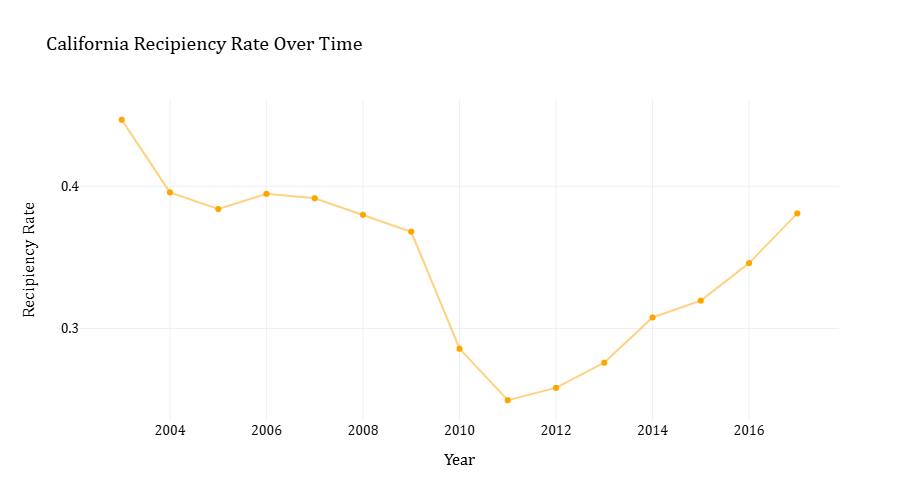

In [369]:
pio.templates.default = 'plotly_white'

fig1 = px.line(
             x = ca_state['Year'], 
             y = ca_state['Recipiency Rate']
              )
fig1.update_traces(line=dict(color = 'rgba(255, 165, 0,0.5)'))

fig2 = px.scatter(
                x = ca_state['Year'], 
                y = ca_state['Recipiency Rate'],
                color_discrete_sequence=['rgba(255, 165, 0,1)'])

fig1 = go.Figure(data=fig1.data + fig2.data )
fig1.update_layout(title_text="California Recipiency Rate Over Time",
                   xaxis_title="Year", yaxis_title="Recipiency Rate",
                   height =500,
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    ),
                   xaxis=dict(
                        tickmode='linear',   
                        tick0=2000,          
                        dtick=2              
                    ),
                   yaxis=dict(
                        tick0=0,          
                        dtick=0.1 
                    ),
                   legend=dict(
                        orientation="v",     
                        x=1.1,
                        xanchor="center",
                        y=0.8
                    )
                  )
fig1.show()

In [ ]:
pio.templates.default = 'plotly_white'

fig1 = px.line(
             x = range(2003, 2024), 
             y = corr_coefs
              )
fig1.update_traces(line=dict(color = 'rgba(255, 165, 0,0.5)'))

fig2 = px.scatter(
                x = range(2003, 2024), 
                y = corr_coefs,
                color_discrete_sequence=['rgba(255, 165, 0,1)'])

fig1 = go.Figure(data=fig1.data + fig2.data )
fig1.update_layout(title_text="California Recipiency Rate Over Time",
                   xaxis_title="Year", yaxis_title="Recipiency Rate",
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    ),
                   xaxis=dict(
                        tickmode='linear',   
                        tick0=2000,          
                        dtick=2              
                    ),
                   yaxis=dict(
                        tick0=0,          
                        dtick=0.1 
                    ),
                   legend=dict(
                        orientation="v",     
                        x=1.1,
                        xanchor="center",
                        y=0.8
                    )
                  )
fig1.show()

In [264]:
ca_realwba_trend = master_trim[master_trim['State'] == "CA"][['Year', 'Average WBA', 'Maximum WBA',
                                                    'Real Average WBA (state, 2000 base)', 
                                                    'Real Maximum WBA (state, 2000 base)', 
                                                    'Real Average WBA (regional, 2000 base)', 
                                                    'Real Maximum WBA (regional, 2000 base)']]
ca_realwba_trend

,Year,Average WBA,Maximum WBA,"Real Average WBA (state, 2000 base)","Real Maximum WBA (state, 2000 base)","Real Average WBA (regional, 2000 base)","Real Maximum WBA (regional, 2000 base)"
159,2003,255.88,370.0,232.07,335.58,237.16,342.93
211,2004,266.72,410.0,235.33,361.75,241.57,371.34
263,2005,288.56,450.0,250.10,390.03,253.60,395.48
315,2006,296.48,450.0,248.20,376.72,251.94,382.40
367,2007,308.70,450.0,248.98,362.95,254.26,370.64
419,2008,315.07,450.0,248.78,355.32,250.74,358.12
471,2009,326.24,450.0,249.89,344.69,260.61,359.47
523,2010,314.46,450.0,238.54,341.35,248.49,355.60
575,2011,307.98,450.0,227.10,331.82,236.65,345.78
627,2012,305.81,450.0,219.31,322.71,230.04,338.50


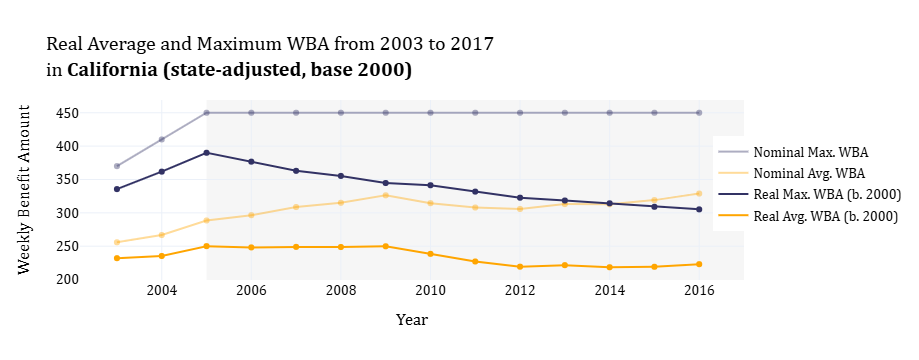

In [298]:
pio.templates.default = 'plotly_white'

fig1 = px.line(data_frame = ca_realwba_trend[:14], 
             x = "Year", 
             y = "Real Average WBA (state, 2000 base)",
              )
fig1.update_traces(line=dict(color = 'rgba(255, 165, 0,1)'), name="Real Avg. WBA (b. 2000)", showlegend=True)

fig2 = px.scatter(data_frame = ca_realwba_trend[:14], 
                x = "Year", 
                y = "Real Average WBA (state, 2000 base)",
                color_discrete_sequence=["orange"])

fig3 = px.line(data_frame = ca_realwba_trend[:14], 
             x = "Year", 
             y = "Real Maximum WBA (state, 2000 base)")
fig3.update_traces(line=dict(color = 'rgba(50,50,100,1)'), name="Real Max. WBA (b. 2000)", showlegend=True)

fig4= px.scatter(data_frame = ca_realwba_trend[:14], 
                x = "Year", 
                y = "Real Maximum WBA (state, 2000 base)",
                color_discrete_sequence=["rgb(50,50,100)"])

fig5 = px.line(data_frame = ca_realwba_trend[:14], 
             x = "Year", 
             y = "Average WBA",
            )
fig5.update_traces(line=dict(color = 'rgba(255, 165, 0,0.4)'), name="Nominal Avg. WBA", showlegend=True)

fig6 = px.scatter(data_frame = ca_realwba_trend[:14], 
                x = "Year", 
                y = "Average WBA",
                color_discrete_sequence=['rgba(255, 165, 0,0.4)'])

fig7 = px.line(data_frame = ca_realwba_trend[:14], 
             x = "Year", 
             y = "Maximum WBA",
            )
fig7.update_traces(line=dict(color = 'rgba(50,50,100,0.4)'), name="Nominal Max. WBA", showlegend=True)

fig8 = px.scatter(data_frame = ca_realwba_trend[:14], 
                x = "Year", 
                y = "Maximum WBA",
                color_discrete_sequence=['rgba(50,50,100,0.4)'])

fig1 = go.Figure(data=fig7.data + fig8.data + fig5.data + fig6.data + fig3.data + fig4.data + fig1.data + fig2.data)
fig1.update_layout(title_text="Real Average and Maximum WBA from 2003 to 2017 <br>in <b>California (state-adjusted, base 2000)</b>",
                   xaxis_title="Year", yaxis_title="Weekly Benefit Amount",
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    ),
                   xaxis=dict(
                        tickmode='linear',   
                        tick0=2000,          
                        dtick=2              
                    ),
                   yaxis=dict(
                        tick0=200,          
                        dtick=50 
                    ),
                   legend=dict(
                        orientation="v",     
                        x=1.1,
                        xanchor="center",
                        y=0.8
                    )
                  )
fig1.add_shape(
    type="rect",
    x0=2005, x1=2017,  
    y0=0, y1=1,         
    xref="x",
    yref="paper",     
    fillcolor="lightgray",
    opacity=0.2,
    layer="below",    
    line_width=0
)

In [200]:
write_html(fig1, "fig_2a.html")

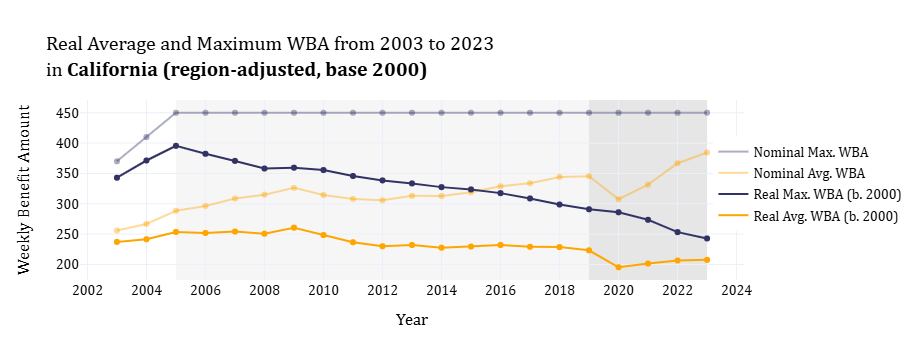

In [267]:
pio.templates.default = 'plotly_white'

fig1 = px.line(data_frame = ca_realwba_trend, 
             x = "Year", 
             y = "Real Average WBA (regional, 2000 base)",
              )
fig1.update_traces(line=dict(color = 'rgba(255, 165, 0,1)'), name="Real Avg. WBA (b. 2000)", showlegend=True)

fig2 = px.scatter(data_frame = ca_realwba_trend, 
                x = "Year", 
                y = "Real Average WBA (regional, 2000 base)",
                color_discrete_sequence=["orange"])

fig3 = px.line(data_frame = ca_realwba_trend, 
             x = "Year", 
             y = "Real Maximum WBA (regional, 2000 base)")
fig3.update_traces(line=dict(color = 'rgba(50,50,100,1)'), name="Real Max. WBA (b. 2000)", showlegend=True)

fig4= px.scatter(data_frame = ca_realwba_trend, 
                x = "Year", 
                y = "Real Maximum WBA (regional, 2000 base)",
                color_discrete_sequence=["rgb(50,50,100)"])

fig5 = px.line(data_frame = ca_realwba_trend, 
             x = "Year", 
             y = "Average WBA",
            )
fig5.update_traces(line=dict(color = 'rgba(255, 165, 0,0.4)'), name="Nominal Avg. WBA", showlegend=True)

fig6 = px.scatter(data_frame = ca_realwba_trend, 
                x = "Year", 
                y = "Average WBA",
                color_discrete_sequence=['rgba(255, 165, 0,0.4)'])

fig7 = px.line(data_frame = ca_realwba_trend, 
             x = "Year", 
             y = "Maximum WBA",
            )
fig7.update_traces(line=dict(color = 'rgba(50,50,100,0.4)'), name="Nominal Max. WBA", showlegend=True)

fig8 = px.scatter(data_frame = ca_realwba_trend, 
                x = "Year", 
                y = "Maximum WBA",
                color_discrete_sequence=['rgba(50,50,100,0.4)'])

fig1 = go.Figure(data=fig7.data + fig8.data + fig5.data + fig6.data + fig3.data + fig4.data + fig1.data + fig2.data )
fig1.update_layout(title_text="Real Average and Maximum WBA from 2003 to 2023 <br>in <b>California (region-adjusted, base 2000)</b>",
                   xaxis_title="Year", yaxis_title="Weekly Benefit Amount",
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    ),
                   xaxis=dict(
                        tickmode='linear',   
                        tick0=2000,          
                        dtick=2              
                    ),
                   yaxis=dict(
                        tick0=200,          
                        dtick=50 
                    ),
                   legend=dict(
                        orientation="v",     
                        x=1.1,
                        xanchor="center",
                        y=0.8
                    )
                  )
fig1.add_shape(
    type="rect",
    x0=2019, x1=2023,  
    y0=0, y1=1,         
    xref="x",
    yref="paper",     
    fillcolor="gray",
    opacity=0.2,
    layer="below",    
    line_width=0
)
fig1.add_shape(
    type="rect",
    x0=2005, x1=2019,  
    y0=0, y1=1,         
    xref="x",
    yref="paper",     
    fillcolor="lightgray",
    opacity=0.2,
    layer="below",    
    line_width=0
)

fig1.show()

In [204]:
write_html(fig1, "fig_2b.html")

## Figure 3: Changes in Real WBA from 2005-2023 across states, regions

In [69]:
master.columns

Index(['Unnamed: 0', 'Year', 'State', 'Replacement Ratio 1',
       'Replacement Ratio 2', 'Recipiency Rate', 'Average WBA', 'Minimum WBA',
       'Maximum WBA', 'Average Weekly Wage', 'Region', 'Annual Regional CPI-U',
       'Annualized State Inflation Rate', 'MET',
       'Real Average WBA (regional, 2000 base)',
       'Real Minimum WBA (regional, 2000 base)',
       'Real Maximum WBA (regional, 2000 base)',
       'Real Average WBA (state, 2000 base)',
       'Real Minimum WBA (state, 2000 base)',
       'Real Maximum WBA (state, 2000 base)',
       'Real Average WBA (regional, 2023 base)',
       'Real Minimum WBA (regional, 2023 base)',
       'Real Maximum WBA (regional, 2023 base)',
       'Real Average WBA (state, 2017 base)',
       'Real Minimum WBA (state, 2017 base)',
       'Real Maximum WBA (state, 2017 base)'],
      dtype='object')

In [252]:
rec_repl = master[['Year', 'State', 'Recipiency Rate', 
                   'Real Average WBA (regional, 2000 base)',
                   'Real Minimum WBA (regional, 2000 base)',
                   'Real Maximum WBA (regional, 2000 base)']]
rec_repl = rec_repl[(rec_repl['Year'] == 2003) | (rec_repl['Year'] == 2023)]
#rec_repl

In [253]:
starts = rec_repl[rec_repl['Year'] == 2003]
ends = rec_repl[rec_repl['Year'] == 2023]
ends = ends.rename(columns={"Real Average WBA (regional, 2000 base)": '1',
                            "Real Minimum WBA (regional, 2000 base)": '2',
                            "Real Maximum WBA (regional, 2000 base)": '3'})
starts = starts.merge(ends, on='State', how='left')
#starts

In [254]:
starts['% Change in Real Average WBA'] = ((starts['1'] - starts['Real Average WBA (regional, 2000 base)'])/starts['Real Average WBA (regional, 2000 base)'])*100
starts['% Change in Real Maximum WBA'] = ((starts["3"] - starts['Real Maximum WBA (regional, 2000 base)'])/starts['Real Maximum WBA (regional, 2000 base)'])*100
starts['% Change in Real Minimum WBA'] = ((starts["2"] - starts['Real Minimum WBA (regional, 2000 base)'])/starts['Real Minimum WBA (regional, 2000 base)'])*100
#starts

In [256]:
percent_changes = starts[['State', '% Change in Real Average WBA', '% Change in Real Minimum WBA', '% Change in Real Maximum WBA']]
percent_changes['% Change in Real Average WBA'].mean(), percent_changes['% Change in Real Maximum WBA'].mean()

(-0.39711467908943665, -5.483130882219137)

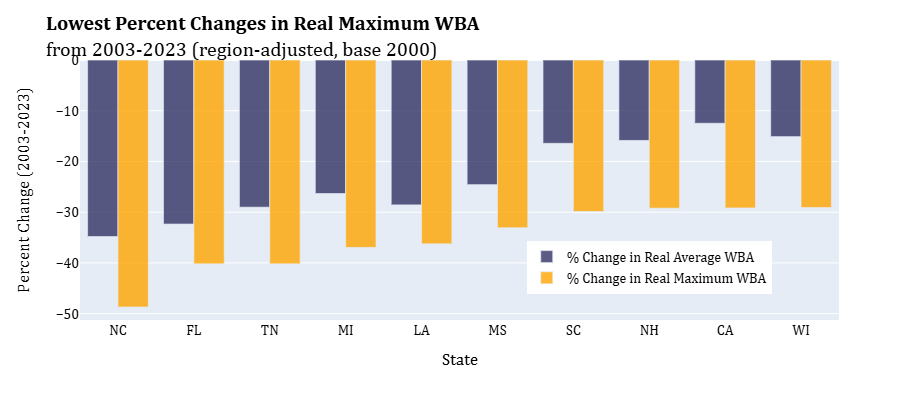

In [42]:
fig1 = px.bar(percent_changes.sort_values(by='% Change in Real Maximum WBA').iloc[range(10),:], 
             x='State', 
             y=['% Change in Real Average WBA', '% Change in Real Maximum WBA'], 
             color_discrete_sequence=['rgba(50,50,100,0.8)', 'rgba(255, 165, 0,0.8)'])
fig1.update_traces(showlegend=True)
fig1.update_layout(
    title_text="<b>Lowest Percent Changes in Real Maximum WBA</b> <br>from 2003-2023 (region-adjusted, base 2000)",
    width= 1000,
    height=400,
    barmode='group',
                   xaxis_title="State", yaxis_title="Percent Change (2003-2023)",
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    ),
                   legend=dict(
                        title = "",
                        orientation="v",     
                        x=0.75,
                        xanchor="center",
                        y=0.1
                    )
                  )
fig1.update_traces(width=0.4) 
fig1.show()

In [43]:
write_html(fig1, "fig_3a.html")

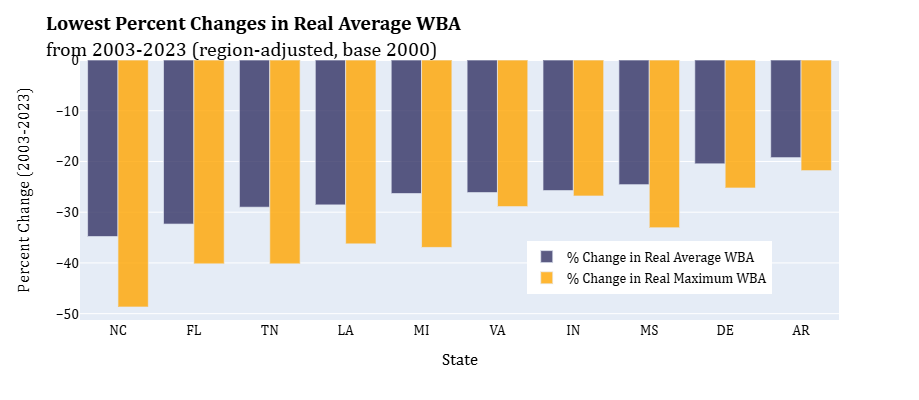

In [44]:
fig1 = px.bar(percent_changes.sort_values(by='% Change in Real Average WBA').iloc[range(10),:], 
             x='State', 
             y=['% Change in Real Average WBA', '% Change in Real Maximum WBA'], 
             color_discrete_sequence=['rgba(50,50,100,0.8)', 'rgba(255, 165, 0,0.8)'])
fig1.update_traces(showlegend=True)
fig1.update_layout(
    title_text="<b>Lowest Percent Changes in Real Average WBA</b> <br>from 2003-2023 (region-adjusted, base 2000)",
    width= 1000,
    height=400,
    barmode='group',
                   xaxis_title="State", yaxis_title="Percent Change (2003-2023)",
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    ),
                   legend=dict(
                        title="",
                        orientation="v",     
                        x=0.75,
                        xanchor="center",
                        y=0.1
                    )
                  )
fig1.update_traces(width=0.4) 
fig1.show()

In [45]:
write_html(fig1, "fig_3b.html")

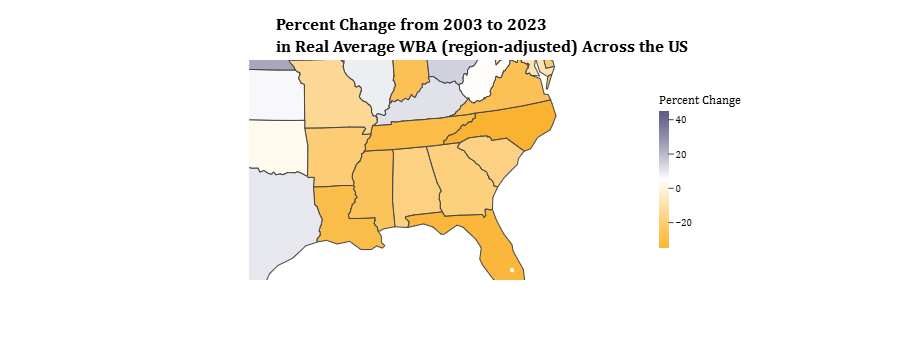

In [40]:
fig = px.choropleth(
    data_frame=percent_changes,
    locations='State',               
    locationmode='USA-states',       
    color='% Change in Real Average WBA',                   
    color_continuous_scale= colorscale2,
    scope='usa',                      
)

fig.update_layout(
    title={
        'text': "<b>Percent Change from 2003 to 2023 <br>in Real Average WBA (region-adjusted) Across the US </b>",
        'x': 0.3, 
        'xanchor': 'left'
    },
    font=dict(
        family="Cambria",  
        size=12,         
        color="black",
    ),
    coloraxis_colorbar=dict(
        title='Percent Change',
        x=0.75,            
        len=0.8,           
        thickness=10,      
        ticks='outside',
        tickfont=dict(size=10),
    )
)

fig.show()

In [46]:
write_html(fig, "fig_3c.html")

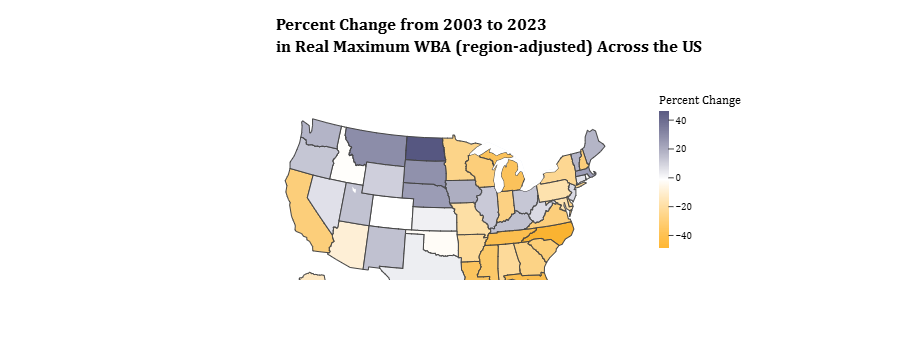

In [47]:
fig = px.choropleth(
    data_frame=percent_changes,
    locations='State',               
    locationmode='USA-states',       
    color='% Change in Real Maximum WBA',                   
    color_continuous_scale= colorscale2,
    scope='usa',                      
)

fig.update_layout(
    title={
        'text': "<b>Percent Change from 2003 to 2023 <br>in Real Maximum WBA (region-adjusted) Across the US </b>",
        'x': 0.3, 
        'xanchor': 'left'
    },
    font=dict(
        family="Cambria",  
        size=12,         
        color="black",
    ),
    coloraxis_colorbar=dict(
        title='Percent Change',
        x=0.75,            
        len=0.8,           
        thickness=10,      
        ticks='outside',
        tickfont=dict(size=10),
    )
)

fig.show()

In [48]:
write_html(fig, "fig_3d.html")

## Figure 4 (bar): What the Max WBA would have to be today to match that in 2000/2005, vs what it is now

## Figure 5: Relationship between Replacement Rate and Recipiency Rate from 2003-2023

In [118]:
master_trim

,Unnamed: 0,Year,State,Replacement Ratio 1,Replacement Ratio 2,Recipiency Rate,Average WBA,Minimum WBA,Maximum WBA,Average Weekly Wage,...,"Real Maximum WBA (regional, 2000 base)","Real Average WBA (state, 2000 base)","Real Minimum WBA (state, 2000 base)","Real Maximum WBA (state, 2000 base)","Real Average WBA (regional, 2023 base)","Real Minimum WBA (regional, 2023 base)","Real Maximum WBA (regional, 2023 base)","Real Average WBA (state, 2017 base)","Real Minimum WBA (state, 2017 base)","Real Maximum WBA (state, 2017 base)"
155,155,2003,AK,0.308,0.274,0.558523,177.03,44.0,248.0,645.32,...,229.85,167.81,41.71,235.09,303.97,75.55,425.83,255.01,63.38,357.25
156,156,2003,AL,0.422,0.379,0.307436,180.19,45.0,210.0,474.86,...,198.04,166.35,41.54,193.87,301.25,75.23,351.09,242.48,60.56,282.60
157,157,2003,AR,0.512,0.498,0.471322,228.27,62.0,345.0,458.49,...,325.35,212.68,57.77,321.44,381.64,103.66,576.79,276.21,75.02,417.46
158,158,2003,AZ,0.406,0.328,0.302321,187.71,40.0,205.0,572.38,...,190.00,NaN,NaN,NaN,322.31,68.68,351.99,NaN,NaN,NaN
159,159,2003,CA,0.447,0.371,0.446838,255.88,40.0,370.0,690.17,...,342.93,232.07,36.28,335.58,439.36,68.68,635.31,350.14,54.73,506.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,1241,2023,VT,0.531,0.476,0.405788,496.00,80.0,668.0,1042.34,...,381.91,NaN,NaN,NaN,496.00,80.00,668.00,NaN,NaN,NaN
1242,1242,2023,WA,0.494,0.436,0.311163,710.91,317.0,999.0,1631.39,...,539.24,NaN,NaN,NaN,710.91,317.00,999.00,NaN,NaN,NaN
1243,1243,2023,WI,0.374,0.325,0.287291,342.65,54.0,370.0,1053.13,...,220.23,NaN,NaN,NaN,342.65,54.00,370.00,NaN,NaN,NaN
1244,1244,2023,WV,0.442,0.419,0.238561,401.43,24.0,630.0,957.72,...,355.36,NaN,NaN,NaN,401.43,24.00,630.00,NaN,NaN,NaN


In [120]:
# Prepare variables
X = master[master['Year']==2023][['Replacement Ratio 1']]
y = master[master['Year']==2023]['Recipiency Rate']

# Fit OLS model
model = LinearRegression()
model.fit(X, y)

# Get slope and R^2
slope = model.coef_[0]
r_squared = model.score(X, y)

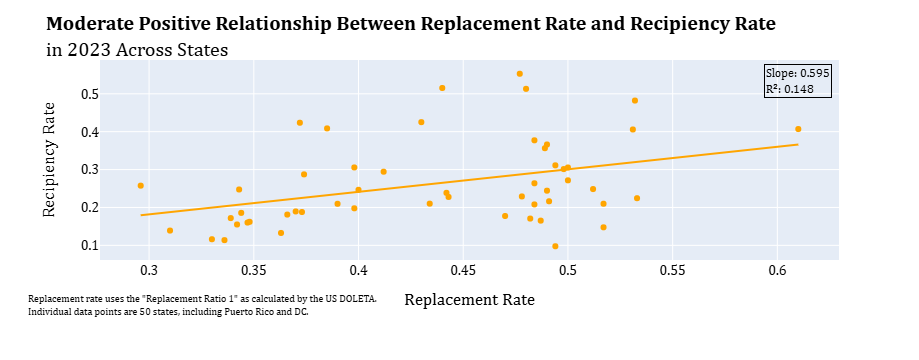

In [122]:
fig = px.scatter(data_frame = master[master['Year']==2023],
                 x = 'Replacement Ratio 1',
                 y = 'Recipiency Rate',
                 hover_data = ['State'],
                 trendline='ols',
                 color_discrete_sequence=['rgba(255, 165, 0,1)'])

fig.update_layout(title_text="<b>Moderate Positive Relationship Between Replacement Rate and Recipiency Rate</b> <br>in 2023 Across States",
                   xaxis_title="Replacement Rate", yaxis_title="Recipiency Rate",
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    )
                  )

fig.update_layout()
fig.add_annotation(
    text='Replacement rate uses the "Replacement Ratio 1" as calculated by the US DOLETA. <br>Individual data points are 50 states, including Puerto Rico and DC.',
    showarrow=False,
    xref="paper",
    yref="paper",
    x=-0.1,
    y=-0.15,
    xanchor="left",
    yanchor="top",
    font=dict(size=10),
    align="left"
)
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.99, y=0.98,
    text=f"Slope: {slope:.3f}<br>R²: {r_squared:.3f}",
    showarrow=False,
    font=dict(size=12, color="black"),
    align="left",
    bordercolor="black",
    borderwidth=1
)
fig.update_layout(margin={"l":100,"b":100})
fig.show()

In [123]:
write_html(fig, "fig_5a.html")

In [72]:
from scipy.stats import pearsonr

def get_corr_coef_for_year(df, year, x, y, plotly=False):
    df = df[df['Year'] == year]
    r, _ = pearsonr(df[x], df[y])
    if plotly:
        fig = px.scatter(data_frame = df,
                 x = x,
                 y = y,
                 width = 500,
                 height = 300,
                 hover_data = ['State'],
                 trendline='ols')

        fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
        fig.show()
    return r

In [73]:
corr_coefs = []
for year in range(2003, 2024):
    corr_coefs.append(get_corr_coef_for_year(master_trim, year = year, 
                           x = 'Replacement Ratio 1', 
                           y = 'Recipiency Rate', 
                           plotly=False))
corr_coefs

[0.028084213665320504,
 0.11317300507904349,
 0.006514091312112065,
 0.00627151994019326,
 0.10357100183511253,
 0.1954793284790694,
 0.3142160515415521,
 0.16196671531296547,
 0.0974385506305968,
 0.19172450425433624,
 0.27488560075395385,
 0.346615872328723,
 0.408447750726224,
 0.43890767849970436,
 0.439572968593068,
 0.4108269145600594,
 0.39007428642564634,
 0.2089356408498317,
 0.15534582335615787,
 0.4000733450821181,
 0.3843563096781534]

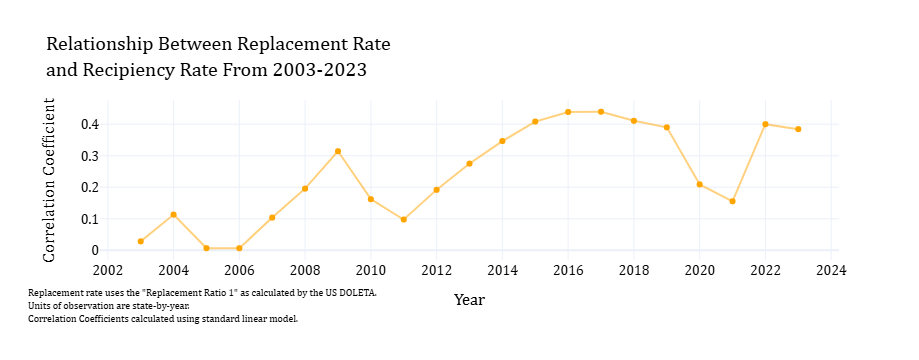

In [93]:
pio.templates.default = 'plotly_white'

fig1 = px.line(
             x = range(2003, 2024), 
             y = corr_coefs
              )
fig1.update_traces(line=dict(color = 'rgba(255, 165, 0,0.5)'))

fig2 = px.scatter(
                x = range(2003, 2024), 
                y = corr_coefs,
                color_discrete_sequence=['rgba(255, 165, 0,1)'])

fig1 = go.Figure(data=fig1.data + fig2.data )
fig1.update_layout(title_text="Relationship Between Replacement Rate <br>and Recipiency Rate From 2003-2023",
                   xaxis_title="Year", yaxis_title="Correlation Coefficient",
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    ),
                   xaxis=dict(
                        tickmode='linear',   
                        tick0=2000,          
                        dtick=2              
                    ),
                   yaxis=dict(
                        tick0=0,          
                        dtick=0.1 
                    ),
                   legend=dict(
                        orientation="v",     
                        x=1.1,
                        xanchor="center",
                        y=0.8
                    )
                  )

fig1.add_annotation(
    text='''Replacement rate uses the "Replacement Ratio 1" as calculated by the US DOLETA. 
            <br>Units of observation are state-by-year.
            <br>Correlation Coefficients calculated using standard linear model.''',
    showarrow=False,
    xref="paper",
    yref="paper",
    x=-0.1,
    y=-0.15,
    xanchor="left",
    yanchor="top",
    font=dict(size=10),
    align="left"
)
fig1.update_layout(margin={"l":100,"b":100})

fig1.show()

In [94]:
write_html(fig1, "fig_5b.html")

In [14]:
del percent_changes

## Figure 6 (scatter): Changes in Recipiency rate vs. changes in real WBA from 2005-2023

In [18]:
rec_repl = master[['Year', 'State', 'Recipiency Rate', 'Replacement Ratio 1',
                   'Real Average WBA (regional, 2000 base)',
                   'Real Minimum WBA (regional, 2000 base)',
                   'Real Maximum WBA (regional, 2000 base)']]

In [34]:
rec_repl = master[['Year', 'State', 'Recipiency Rate', 
                   'Real Average WBA (regional, 2000 base)',
                   'Real Minimum WBA (regional, 2000 base)',
                   'Real Maximum WBA (regional, 2000 base)']]
rec_repl = rec_repl[rec_repl['State'] == 'CA']
rec_repl

,Year,State,Recipiency Rate,"Real Average WBA (regional, 2000 base)","Real Minimum WBA (regional, 2000 base)","Real Maximum WBA (regional, 2000 base)"
4,2000,CA,0.409791,163.65,40.00,230.00
56,2001,CA,0.465113,169.93,38.59,221.88
107,2002,CA,0.458933,213.14,37.86,312.31
159,2003,CA,0.446838,237.16,37.07,342.93
211,2004,CA,0.395734,241.57,36.23,371.34
263,2005,CA,0.384043,253.60,35.15,395.48
315,2006,CA,0.394716,251.94,33.99,382.40
367,2007,CA,0.391623,254.26,32.95,370.64
419,2008,CA,0.379992,250.74,31.83,358.12
471,2009,CA,0.368100,260.61,31.95,359.47


In [139]:
percent_changes.to_csv("percent_changes_wba_recipiency.csv", index=False)

In [7]:
percent_changes = pd.read_csv("percent_changes.csv")

In [8]:
percent_changes

,State,Change in Recipiency Rate (2000-2023),% Change in Real Average WBA (2000-2023),% Change in Real Maximum WBA (2000-2023),% Change in Real Minimum WBA (2000-2023),Change in Recipiency Rate (2001-2023),% Change in Real Average WBA (2001-2023),% Change in Real Maximum WBA (2001-2023),% Change in Real Minimum WBA (2001-2023),Change in Recipiency Rate (2002-2023),...,% Change in Real Maximum WBA (2015-2023),% Change in Real Minimum WBA (2015-2023),Change in Recipiency Rate (2016-2023),% Change in Real Average WBA (2016-2023),% Change in Real Maximum WBA (2016-2023),% Change in Real Minimum WBA (2016-2023),Change in Recipiency Rate (2017-2023),% Change in Real Average WBA (2017-2023),% Change in Real Maximum WBA (2017-2023),% Change in Real Minimum WBA (2017-2023)
0,AK,-35.127071,-9.836260,-19.467742,-31.295455,-34.688606,-7.823872,-16.518977,-28.786808,-34.353619,...,-24.956790,-24.950348,-13.833057,-17.487377,-23.508234,-23.507085,-10.278309,-13.652633,-21.336012,-21.337497
1,AL,-12.997964,-13.793944,-18.357895,-43.600000,-18.606607,-13.951225,-16.453924,-42.278826,-16.856132,...,-19.426553,-22.361578,-0.876242,-11.953951,-18.533690,-21.497062,-1.982706,-10.776895,-16.865856,-19.911644
2,AR,-24.383506,-17.810875,-17.673139,-16.927273,-36.687743,-19.838598,-18.901428,-17.971275,-32.861926,...,-22.359225,-22.361937,-11.301520,-11.116224,-21.499105,-21.494845,-7.010270,-11.229701,-19.892304,-19.884271
3,AZ,-2.452821,-4.956615,-15.741463,191.475000,-8.457287,-6.977131,-12.656756,202.124903,-8.885538,...,0.057927,28.643937,0.960406,4.476030,1.989844,31.117859,0.695127,6.217518,4.881899,34.848485
4,CA,1.377678,26.843874,5.608696,-46.025000,-4.154545,22.156182,9.473589,-44.052863,-3.536518,...,-24.956747,-24.956552,7.757597,-10.564412,-23.510518,-23.521077,4.261701,-9.409095,-21.338126,-21.347905
5,CO,3.762276,24.619720,8.115727,-46.040000,-2.578434,13.534522,5.498610,-44.071310,-2.598808,...,4.656173,-24.972191,-3.616974,8.209856,2.851094,-23.526077,-3.120194,9.639618,2.900474,-21.341108
6,CT,-33.893588,9.806788,11.027624,-42.800000,-33.178276,5.205179,4.059652,-41.192598,-23.173083,...,-4.884513,-19.587629,0.054707,9.750415,-4.522995,-18.750000,-1.890836,6.687397,-5.608267,-17.261331
7,DC,-7.532700,-0.262112,-18.951456,-43.600000,-5.459427,-11.771071,-17.061862,-42.284077,-9.812468,...,-3.976075,-22.356828,9.158578,1.769635,-2.915181,-21.514055,7.930824,-8.261341,-16.313573,-19.909117
8,DE,-16.979198,-17.767625,-28.374603,-43.600000,-25.516927,-16.628421,-26.703918,-42.272262,-25.764141,...,-5.889714,-22.367515,-7.524400,6.284197,-4.849865,-21.503132,-4.582928,5.083021,-2.900671,-19.886364
9,FL,-12.203312,-33.112463,-43.592727,-43.593750,-17.016317,-33.300145,-42.276635,-42.276943,-20.231457,...,-22.358476,-22.365591,1.648131,-15.888597,-21.497976,-21.487603,1.187059,-14.951815,-19.892584,-19.884598


In [272]:
def add_range_to_percent_changes(start, end):
    starts = master[master['Year'] == start][['State', 'Recipiency Rate', 
                                              'Real Average WBA (regional, 2000 base)',
                                              'Real Maximum WBA (regional, 2000 base)',
                                              'Real Minimum WBA (regional, 2000 base)']]
    ends = master[master['Year'] == end][['State', 'Recipiency Rate', 
                                              'Real Average WBA (regional, 2000 base)',
                                              'Real Maximum WBA (regional, 2000 base)',
                                              'Real Minimum WBA (regional, 2000 base)']]
    ends = ends.rename(columns={'Recipiency Rate': 'a', 
                                'Real Average WBA (regional, 2000 base)': 'b',
                                'Real Maximum WBA (regional, 2000 base)': 'c',
                                'Real Minimum WBA (regional, 2000 base)': 'd'})
    starts = starts.merge(ends, on="State", how='left')
    
    starts[f'Change in Recipiency Rate ({start}-{end})'] = (starts['a'] - starts['Recipiency Rate'])*100
    starts[f'Change in Real Average WBA ({start}-{end})'] = (starts['b'] - starts['Real Average WBA (regional, 2000 base)'])
    starts[f'Change in Real Maximum WBA ({start}-{end})'] = (starts["c"] - starts['Real Maximum WBA (regional, 2000 base)'])
    starts[f'% Change in Recipiency Rate ({start}-{end})'] = ((starts['a'] - starts['Recipiency Rate'])/starts['Recipiency Rate'])*100
    starts[f'% Change in Real Average WBA ({start}-{end})'] = ((starts['b'] - starts['Real Average WBA (regional, 2000 base)'])/starts['Real Average WBA (regional, 2000 base)'])*100
    starts[f'% Change in Real Maximum WBA ({start}-{end})'] = ((starts["c"] - starts['Real Maximum WBA (regional, 2000 base)'])/starts['Real Maximum WBA (regional, 2000 base)'])*100
    starts[f'% Change in Real Minimum WBA ({start}-{end})'] = ((starts["d"] - starts['Real Minimum WBA (regional, 2000 base)'])/starts['Real Minimum WBA (regional, 2000 base)'])*100
    
    return starts[['State', f'Change in Recipiency Rate ({start}-{end})', f'% Change in Recipiency Rate ({start}-{end})', f'Change in Real Average WBA ({start}-{end})', f'Change in Real Maximum WBA ({start}-{end})', f'% Change in Real Average WBA ({start}-{end})', f'% Change in Real Maximum WBA ({start}-{end})', f'% Change in Real Minimum WBA ({start}-{end})']]
    

In [273]:
del percent_changes
percent_changes = add_range_to_percent_changes(2000, 2023)
for year in range(2001,2019):
    percent_changes = percent_changes.merge(add_range_to_percent_changes(year, 2023), on='State', how='left')

In [314]:
def add_range_to_percent_changes_state(start, end):
    starts = master[master['Year'] == start][['State', 'Recipiency Rate', 
                                              'Real Average WBA (state, 2000 base)',
                                              'Real Maximum WBA (state, 2000 base)',
                                              'Real Minimum WBA (state, 2000 base)']]
    ends = master[master['Year'] == end][['State', 'Recipiency Rate', 
                                              'Real Average WBA (state, 2000 base)',
                                              'Real Maximum WBA (state, 2000 base)',
                                              'Real Minimum WBA (state, 2000 base)']]
    ends = ends.rename(columns={'Recipiency Rate': 'a', 
                                'Real Average WBA (state, 2000 base)': 'b',
                                'Real Maximum WBA (state, 2000 base)': 'c',
                                'Real Minimum WBA (state, 2000 base)': 'd'})
    starts = starts.merge(ends, on="State", how='left')
    
    starts[f'Change in Recipiency Rate ({start}-{end})'] = (starts['a'] - starts['Recipiency Rate'])*100
    starts[f'Change in Real Average WBA ({start}-{end})'] = (starts['b'] - starts['Real Average WBA (state, 2000 base)'])
    starts[f'Change in Real Maximum WBA ({start}-{end})'] = (starts["c"] - starts['Real Maximum WBA (state, 2000 base)'])
    starts[f'% Change in Recipiency Rate ({start}-{end})'] = ((starts['a'] - starts['Recipiency Rate'])/starts['Recipiency Rate'])*100
    starts[f'% Change in Real Average WBA ({start}-{end})'] = ((starts['b'] - starts['Real Average WBA (state, 2000 base)'])/starts['Real Average WBA (state, 2000 base)'])*100
    starts[f'% Change in Real Maximum WBA ({start}-{end})'] = ((starts["c"] - starts['Real Maximum WBA (state, 2000 base)'])/starts['Real Maximum WBA (state, 2000 base)'])*100
    starts[f'% Change in Real Minimum WBA ({start}-{end})'] = ((starts["d"] - starts['Real Minimum WBA (state, 2000 base)'])/starts['Real Minimum WBA (state, 2000 base)'])*100
    
    return starts[['State', f'Change in Recipiency Rate ({start}-{end})', f'% Change in Recipiency Rate ({start}-{end})', f'Change in Real Average WBA ({start}-{end})', f'Change in Real Maximum WBA ({start}-{end})', f'% Change in Real Average WBA ({start}-{end})', f'% Change in Real Maximum WBA ({start}-{end})', f'% Change in Real Minimum WBA ({start}-{end})']]
    

In [316]:

percent_changes_state = add_range_to_percent_changes_state(2000, 2017)
for year in range(2001,2015):
    percent_changes_state = percent_changes_state.merge(add_range_to_percent_changes_state(year, 2017), on='State', how='left')

In [319]:
percent_changes_state = percent_changes_state.dropna()
percent_changes_state.to_csv("percent_changes_state.csv")

In [320]:
import pandas as pd
import plotly.express as px
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare variables
X = percent_changes_state[['% Change in Real Average WBA (2003-2017)']]
y = percent_changes_state['Change in Recipiency Rate (2003-2017)']

# Fit OLS model
model = LinearRegression()
model.fit(X, y)

# Get slope and R^2
slope_avg = model.coef_[0]
r_squared_avg = model.score(X, y)

# Prepare variables
X = percent_changes_state[['% Change in Real Maximum WBA (2003-2017)']]
y = percent_changes_state['Change in Recipiency Rate (2003-2017)']

# Fit OLS model
model = LinearRegression()
model.fit(X, y)

# Get slope and R^2
slope_max = model.coef_[0]
r_squared_max = model.score(X, y)

print(slope_avg, r_squared_avg, slope_max, r_squared_max)

0.2940361155849593 0.18903277692923737 0.15144783719801866 0.08933667877983109


In [358]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = percent_changes_state[['% Change in Real Average WBA (2003-2017)']]
y = percent_changes_state['Change in Recipiency Rate (2003-2017)']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                                      OLS Regression Results                                     
Dep. Variable:     Change in Recipiency Rate (2003-2017)   R-squared:                       0.189
Model:                                               OLS   Adj. R-squared:                  0.163
Method:                                    Least Squares   F-statistic:                     7.226
Date:                                   Thu, 01 May 2025   Prob (F-statistic):             0.0115
Time:                                           21:13:20   Log-Likelihood:                -108.73
No. Observations:                                     33   AIC:                             221.5
Df Residuals:                                         31   BIC:                             224.5
Df Model:                                              1                                         
Covariance Type:                               nonrobust                                         
                    

In [322]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = percent_changes_state[['% Change in Real Maximum WBA (2003-2017)']]
y = percent_changes_state['Change in Recipiency Rate (2003-2017)']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                                      OLS Regression Results                                     
Dep. Variable:     Change in Recipiency Rate (2003-2017)   R-squared:                       0.089
Model:                                               OLS   Adj. R-squared:                  0.060
Method:                                    Least Squares   F-statistic:                     3.041
Date:                                   Thu, 01 May 2025   Prob (F-statistic):             0.0911
Time:                                           20:24:18   Log-Likelihood:                -110.65
No. Observations:                                     33   AIC:                             225.3
Df Residuals:                                         31   BIC:                             228.3
Df Model:                                              1                                         
Covariance Type:                               nonrobust                                         
                    

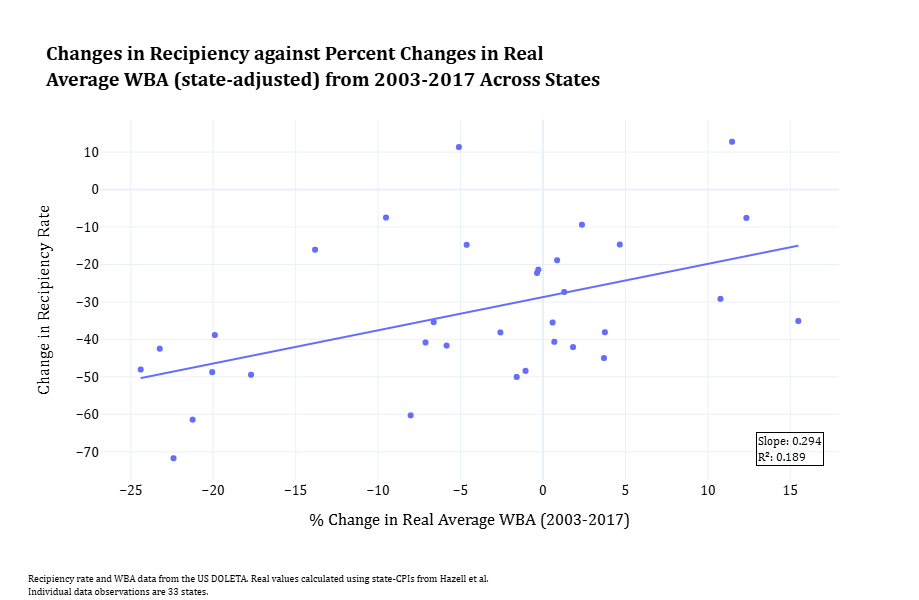

In [366]:
fig1 = px.scatter(data_frame = percent_changes_state,
                 x = '% Change in Real Average WBA (2003-2017)',
                 y = '% Change in Recipiency Rate (2003-2017)',
                 hover_data = ['State'],
                 height=500,
                 trendline='ols')
    
fig1.update_layout(title_text="<b>Changes in Recipiency against Percent Changes in Real <br>Average WBA (state-adjusted) from 2003-2017 Across States",
                   yaxis_title="Change in Recipiency Rate",
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    )
                  )

fig1.update_layout(height=600, width=600)
tickvals=[-50, -25, 0, 25, 50]
fig1.add_annotation(
    text='Recipiency rate and WBA data from the US DOLETA. Real values calculated using state-CPIs from Hazell et al. <br>Individual data observations are 33 states.',
    showarrow=False,
    xref="paper",
    yref="paper",
    x=-0.1,
    y=-0.25,
    xanchor="left",
    yanchor="top",
    font=dict(size=10),
    align="left"
)
fig1.add_annotation(
    xref="paper", yref="paper",
    x=0.98, y=0.04,
    text=f"Slope: {slope_avg:.3f}<br>R²: {r_squared_avg:.3f}",
    showarrow=False,
    font=dict(size=12, color="black"),
    align="left",
    bordercolor="black",
    borderwidth=1
)
fig1.update_layout(margin={"l":100,"b":120, "t":120})
fig1.show()

In [297]:
add_range_to_percent_changes(2003,2023).sort_values('% Change in Real Average WBA (2003-2023)', ascending=False)

,State,Change in Recipiency Rate (2003-2023),% Change in Recipiency Rate (2003-2023),Change in Real Average WBA (2003-2023),Change in Real Maximum WBA (2003-2023),% Change in Real Average WBA (2003-2023),% Change in Real Maximum WBA (2003-2023),% Change in Real Minimum WBA (2003-2023)
28,ND,-6.653704,-17.887148,99.00,126.83,45.065550,46.332286,-36.954915
42,SD,-6.657962,-28.065898,59.72,62.38,29.766236,27.422191,-36.927734
26,MT,-8.924672,-20.027769,56.15,79.37,27.380894,28.833509,61.405672
48,WA,-14.171333,-31.291816,80.16,79.53,26.404902,17.300037,72.542099
29,NE,-19.925569,-52.900073,47.70,58.63,23.328606,23.707088,22.601530
12,IA,-21.795223,-49.270907,53.80,52.34,22.665993,18.989914,20.251293
19,MA,-3.788293,-6.876171,68.39,110.24,21.367869,23.452325,23.317218
21,ME,-6.939450,-18.721570,45.33,45.21,20.958942,17.230734,18.291878
37,OR,-8.636084,-18.629716,48.52,47.28,19.709156,12.595572,14.593968
47,VT,-14.790155,-26.712017,44.79,56.49,18.757067,17.359105,4818.279570


In [275]:
percent_changes.to_csv("percent_changes.csv")

In [216]:
del percent_changes_sliding
percent_changes_sliding = add_range_to_percent_changes(2002, 2012)
for year in range(2003,2014):
    percent_changes_sliding = percent_changes_sliding.merge(add_range_to_percent_changes(year, year+10), on='State', how='left')
percent_changes_sliding = percent_changes_sliding.dropna()
#drop puerto rico

In [217]:
percent_changes_sliding.to_csv("percent_changes_sliding.csv")

In [218]:
len(percent_changes_sliding)

51

In [220]:
import pandas as pd
import plotly.express as px
from sklearn.linear_model import LinearRegression
import numpy as np

def get_slope_r_squared_sliding(data):
    year_start = []
    year_end = []
    r_squared_avgs = []
    slope_avgs = []
    r_squared_maxs = []
    slope_maxs = []
    
    for year in range(2002, 2014):
        start = year
        end = year+10
        year_start.append(start)
        year_end.append(end)
        
        # Prepare variables
        X = data[[f'% Change in Real Average WBA ({start}-{end})']]
        y = data[f'Change in Recipiency Rate ({start}-{end})']

        # Fit OLS model
        model = LinearRegression()
        model.fit(X, y)

        # Get slope and R^2
        slope_avg = model.coef_[0]
        slope_avgs.append(slope_avg)
        r_squared_avg = model.score(X, y)
        r_squared_avgs.append(r_squared_avg)

        # Prepare variables
        X = data[[f'% Change in Real Maximum WBA ({start}-{end})']]
        y = data[f'Change in Recipiency Rate ({start}-{end})']

        # Fit OLS model
        model = LinearRegression()
        model.fit(X, y)

        # Get slope and R^2
        slope_max = model.coef_[0]
        slope_maxs.append(slope_max)
        r_squared_max = model.score(X, y)
        r_squared_maxs.append(r_squared_max)
        
    df = pd.DataFrame()
    df['Year Start'] = year_start
    df['Year End'] = year_end
    df['r_squared_avgs'] = r_squared_avgs
    df['slope_avgs'] = slope_avgs
    df['r_squared_maxs'] = r_squared_maxs
    df['slope_maxs'] = slope_maxs

    return df

In [233]:
sliding_lm = get_slope_r_squared_sliding(percent_changes_sliding)
sliding_lm

,Year Start,Year End,r_squared_avgs,slope_avgs,r_squared_maxs,slope_maxs
0,2002,2012,0.059629,0.157886,0.025171,0.084666
1,2003,2013,0.267180,0.263652,0.085142,0.125549
2,2004,2014,0.317014,0.241067,0.096456,0.112600
3,2005,2015,0.432673,0.290933,0.270820,0.230430
4,2006,2016,0.380279,0.300898,0.286013,0.246494
5,2007,2017,0.261057,0.311021,0.186426,0.216588
6,2008,2018,0.204212,0.308344,0.122655,0.204059
7,2009,2019,0.045415,0.186438,0.117942,0.263570
8,2010,2020,0.045837,0.356509,0.052059,0.368062
9,2011,2021,0.000082,0.007120,0.024022,0.105942


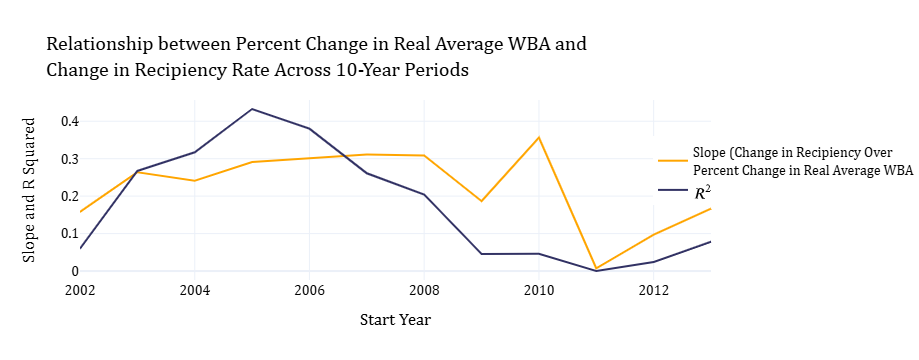

In [249]:
pio.templates.default = 'plotly_white'

fig1 = px.line(data_frame = sliding_lm, 
             x = "Year Start", 
             y = "slope_avgs",
              )
fig1.update_traces(line=dict(color = 'rgba(255, 165, 0,1)'), name="Slope (Change in Recipiency Over <br>Percent Change in Real Average WBA", showlegend=True)

fig3 = px.line(data_frame = sliding_lm, 
             x = "Year Start", 
             y = "r_squared_avgs")
fig3.update_traces(line=dict(color = 'rgba(50,50,100,1)'), name="$$R^2$$", showlegend=True)

fig1 = go.Figure(data=fig1.data + fig3.data)
fig1.update_layout(title_text="Relationship between Percent Change in Real Average WBA and <br>Change in Recipiency Rate Across 10-Year Periods</b>",
                   xaxis_title="Start Year", yaxis_title="Slope and R Squared",
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    ),
                   xaxis=dict(
                        tickmode='linear',   
                        tick0=2000,          
                        dtick=2              
                    ),
                   yaxis=dict(
                        tick0=0,          
                        dtick=0.1 
                    ),
                   legend=dict(
                        orientation="v",     
                        x=1.1,
                        xanchor="center",
                        y=0.8
                    )
                  )

fig1.show()

In [307]:
import pandas as pd
import plotly.express as px
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare variables
X = percent_changes[['% Change in Real Average WBA (2003-2023)']]
y = percent_changes['% Change in Recipiency Rate (2003-2023)']

# Fit OLS model
model = LinearRegression()
model.fit(X, y)

# Get slope and R^2
slope_avg = model.coef_[0]
r_squared_avg = model.score(X, y)

# Prepare variables
X = percent_changes[['% Change in Real Maximum WBA (2003-2023)']]
y = percent_changes['% Change in Recipiency Rate (2003-2023)']

# Fit OLS model
model = LinearRegression()
model.fit(X, y)

# Get slope and R^2
slope_max = model.coef_[0]
r_squared_max = model.score(X, y)

print(slope_avg, r_squared_avg, slope_max, r_squared_max)

0.48137548834602223 0.17230880279714744 0.33800278534325606 0.11843167605548


In [308]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = percent_changes[['% Change in Real Average WBA (2003-2023)']]
y = percent_changes['% Change in Recipiency Rate (2003-2023)']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                                       OLS Regression Results                                      
Dep. Variable:     % Change in Recipiency Rate (2003-2023)   R-squared:                       0.172
Model:                                                 OLS   Adj. R-squared:                  0.156
Method:                                      Least Squares   F-statistic:                     10.41
Date:                                     Thu, 01 May 2025   Prob (F-statistic):            0.00221
Time:                                             00:10:01   Log-Likelihood:                -228.88
No. Observations:                                       52   AIC:                             461.8
Df Residuals:                                           50   BIC:                             465.7
Df Model:                                                1                                         
Covariance Type:                                 nonrobust                                         


In [309]:
X = percent_changes[['% Change in Real Maximum WBA (2003-2023)']]
y = percent_changes['% Change in Recipiency Rate (2003-2023)']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                                       OLS Regression Results                                      
Dep. Variable:     % Change in Recipiency Rate (2003-2023)   R-squared:                       0.118
Model:                                                 OLS   Adj. R-squared:                  0.101
Method:                                      Least Squares   F-statistic:                     6.717
Date:                                     Thu, 01 May 2025   Prob (F-statistic):             0.0125
Time:                                             00:10:06   Log-Likelihood:                -230.52
No. Observations:                                       52   AIC:                             465.0
Df Residuals:                                           50   BIC:                             469.0
Df Model:                                                1                                         
Covariance Type:                                 nonrobust                                         


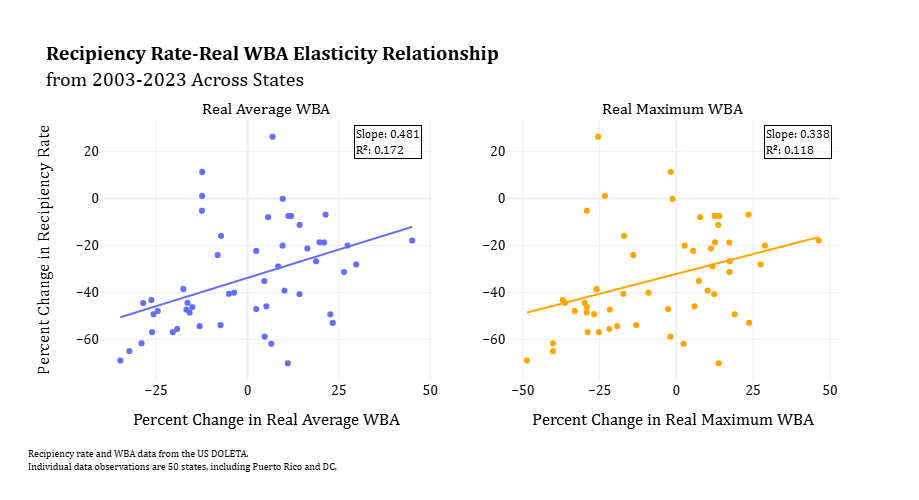

In [310]:
fig1 = px.scatter(data_frame = percent_changes,
                 x = '% Change in Real Average WBA (2003-2023)',
                 y = '% Change in Recipiency Rate (2003-2023)',
                 hover_data = ['State'],
                 height=500,
                 trendline='ols')
fig2 = px.scatter(data_frame = percent_changes,
                 x = '% Change in Real Maximum WBA (2003-2023)',
                 y = '% Change in Recipiency Rate (2003-2023)',
                 hover_data = ['State'],
                 height=500,
                 color_discrete_sequence=['rgba(255, 165, 0,1)'],
                 trendline='ols')

fig = make_subplots(rows=1, cols=2, subplot_titles=("Real Average WBA", "Real Maximum WBA"))

# Add traces from fig1 to subplot 1
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

# Add traces from fig2 to subplot 2
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
    
fig.update_layout(title_text="<b>Recipiency Rate-Real WBA Elasticity Relationship</b> <br>from 2003-2023 Across States",
                   yaxis_title="Percent Change in Recipiency Rate",
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    )
                  )

fig.update_layout(height=500)
tickvals=[-50, -25, 0, 25, 50]
fig.update_xaxes(title_text="Percent Change in Real Average WBA", tickvals=tickvals, row=1, col=1)
fig.update_xaxes(title_text="Percent Change in Real Maximum WBA", tickvals=tickvals, row=1, col=2)
fig.add_annotation(
    text='Recipiency rate and WBA data from the US DOLETA. <br>Individual data observations are 50 states, including Puerto Rico and DC.',
    showarrow=False,
    xref="paper",
    yref="paper",
    x=-0.1,
    y=-0.25,
    xanchor="left",
    yanchor="top",
    font=dict(size=10),
    align="left"
)
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.99, y=0.98,
    text=f"Slope: {slope_max:.3f}<br>R²: {r_squared_max:.3f}",
    showarrow=False,
    font=dict(size=12, color="black"),
    align="left",
    bordercolor="black",
    borderwidth=1
)
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.39, y=0.98,
    text=f"Slope: {slope_avg:.3f}<br>R²: {r_squared_avg:.3f}",
    showarrow=False,
    font=dict(size=12, color="black"),
    align="left",
    bordercolor="black",
    borderwidth=1
)
fig.update_layout(margin={"l":100,"b":120, "t":120})
fig.show()

In [117]:
write_html(fig, "fig_6.html")

In [ ]:
fig = px.scatter(data_frame = percent_changes,
                 x = '% Change in Real Average WBA',
                 y = 'Change in Recipiency Rate',
                 width = 500,
                 height = 300,
                 hover_data = ['State'],
                 trendline='ols')

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [332]:
from scipy.stats import pearsonr

def get_corr_coef_for_year(df, year, x, y, plotly=False):
    df = df[df['Year'] == year]
    r, _ = pearsonr(df[x], df[y])
    if plotly:
        fig = px.scatter(data_frame = df,
                 x = x,
                 y = y,
                 width = 500,
                 height = 300,
                 hover_data = ['State'],
                 trendline='ols')

        fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
        fig.show()
    return r

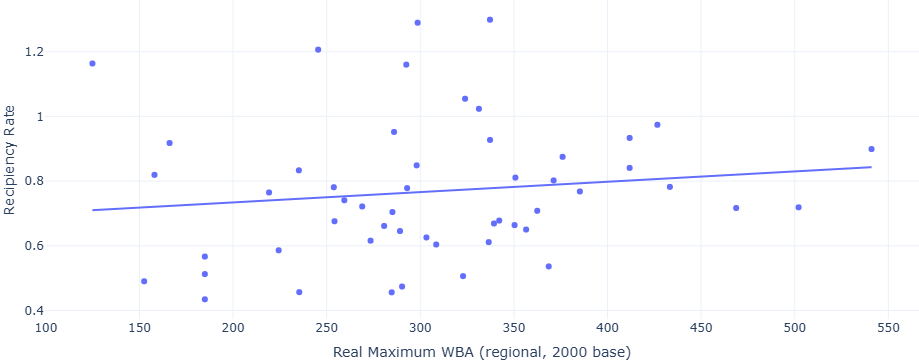

0.13117708759855096

In [340]:
get_corr_coef_for_year(rec_repl, year = 2020, 
                           x = 'Real Maximum WBA (regional, 2000 base)', 
                           y = 'Recipiency Rate', 
                           plotly=True)

In [338]:
corr_coefs = []
for year in range(2000, 2024):
    corr_coefs.append(get_corr_coef_for_year(rec_repl, year = year, 
                           x = 'Real Maximum WBA (regional, 2000 base)', 
                           y = 'Recipiency Rate', 
                           plotly=False))
corr_coefs

[0.4720192040159296,
 0.5414399378043866,
 0.5425022897849476,
 0.5016991735470946,
 0.46967558367951656,
 0.40824622556945833,
 0.43967394753759087,
 0.45944523098400797,
 0.4904731922257971,
 0.5108934412949887,
 0.3988448030616376,
 0.41486186945232395,
 0.47421429023259387,
 0.5187710859072939,
 0.5868903465816666,
 0.6671616789236068,
 0.7088602478148412,
 0.674672788710328,
 0.6459464011505007,
 0.6805550818272315,
 0.13117708759855096,
 0.33164038398265366,
 0.5751197211338104,
 0.6342120252355656]

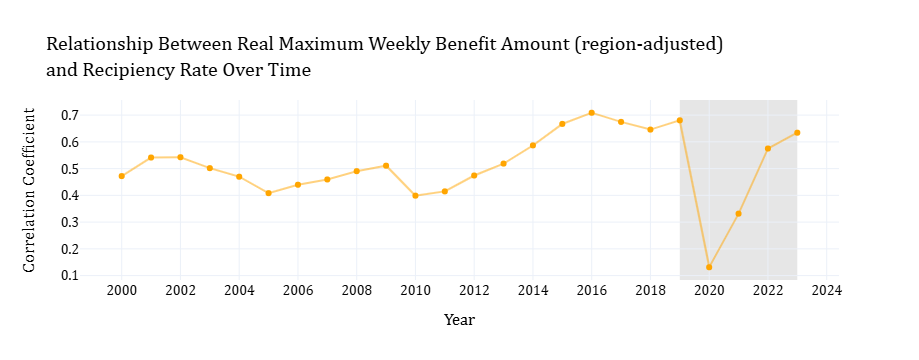

In [347]:
pio.templates.default = 'plotly_white'

fig1 = px.line(
             x = range(2000, 2024), 
             y = corr_coefs
              )
fig1.update_traces(line=dict(color = 'rgba(255, 165, 0,0.5)'))

fig2 = px.scatter(
                x = range(2000, 2024), 
                y = corr_coefs,
                color_discrete_sequence=['rgba(255, 165, 0,1)'])

fig1 = go.Figure(data=fig1.data + fig2.data )
fig1.update_layout(title_text="Relationship Between Real Maximum Weekly Benefit Amount (region-adjusted) <br>and Recipiency Rate Over Time",
                   xaxis_title="Year", yaxis_title="Correlation Coefficient",
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    ),
                   xaxis=dict(
                        tickmode='linear',   
                        tick0=2000,          
                        dtick=2              
                    ),
                   yaxis=dict(
                        tick0=0,          
                        dtick=0.1 
                    ),
                   legend=dict(
                        orientation="v",     
                        x=1.1,
                        xanchor="center",
                        y=0.8
                    )
                  )
fig1.add_shape(
    type="rect",
    x0=2019, x1=2023,  
    y0=0, y1=1,         
    xref="x",
    yref="paper",     
    fillcolor="gray",
    opacity=0.2,
    layer="below",    
    line_width=0
)
fig1.show()

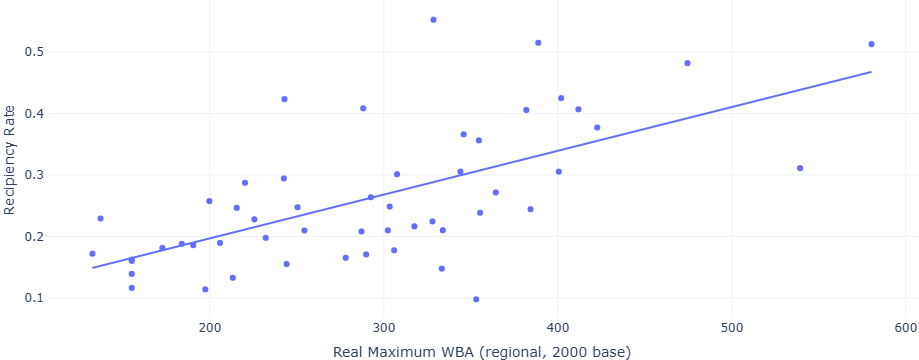

0.6342120252355656

In [349]:
get_corr_coef_for_year(master, year = 2023, 
                           x = 'Real Maximum WBA (regional, 2000 base)', 
                           y = 'Recipiency Rate', 
                           plotly=True)

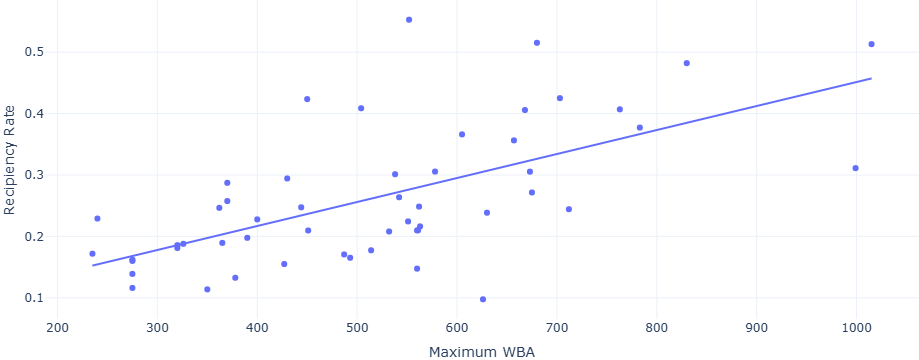

0.6259509370881278

In [350]:
get_corr_coef_for_year(master, year = 2023, 
                           x = 'Maximum WBA', 
                           y = 'Recipiency Rate', 
                           plotly=True)

In [ ]:
# changes in nominal wba against changes in recipiency rate 

## Fig 7a: Changes in Proportion of Nominal Average WBA of Median Housing Cost (ACS Survey) By State between 2010-2023

In [65]:
housingcosts = pd.read_csv("housingcosts2010-2023.csv")
housingcosts = housingcosts.drop("Unnamed: 0", axis=1)
housingcosts['Median selected monthly owner costs (dollars)'] = [
772, 1363, 1119, 657, 1790, 1327, 1704, 1242, 1869, 1087,
1106, 1618, 923, 1254, 867, 819, 882, 741, 705, 949,
1672, 1650, 969, 1180, 650, 876, 794, 893, 1366, 1492,
1907, 794, 1362, 951, 684, 963, 747, 1228, 968, 1555,
838, 777, 836, 1016, 1208, 1155, 1326, 1394, 491, 1090,
858, 260, 858, 1421, 1218, 812, 2137, 1769, 1846, 1328,
2561, 1327, 1245, 1869, 1171, 1366, 1012, 1063, 1113, 906,
938, 1157, 1787, 2056, 1058, 1424, 756, 1036, 1141, 1222,
1407, 1746, 2061, 916, 1621, 1085, 1053, 1068, 970, 1553,
1161, 1708, 972, 1081, 979, 1373, 1555, 1406, 1474, 1777,
621, 1183, 1060, 310
]
housingcosts['Median Weekly Owner Costs'] = round(housingcosts['Median selected monthly owner costs (dollars)']/4.34524, 2)
housingcosts

,State,Median selected monthly owner costs (dollars),Year,Median Weekly Owner Costs
0,AL,772,2010,177.67
1,AK,1363,2010,313.68
2,AZ,1119,2010,257.52
3,AR,657,2010,151.20
4,CA,1790,2010,411.95
...,...,...,...,...
99,WA,1777,2023,408.95
100,WV,621,2023,142.92
101,WI,1183,2023,272.25
102,WY,1060,2023,243.95


In [66]:
housingcosts = housingcosts.merge(master, on=["Year", "State"], how="left")

In [67]:
housingcosts.dtypes

State                                             object
Median selected monthly owner costs (dollars)      int64
Year                                               int64
Median Weekly Owner Costs                        float64
Unnamed: 0                                         int64
Replacement Ratio 1                              float64
Replacement Ratio 2                              float64
Recipiency Rate                                  float64
Average WBA                                      float64
Minimum WBA                                      float64
Maximum WBA                                      float64
Average Weekly Wage                              float64
Region                                            object
Annual Regional CPI-U                            float64
Annualized State Inflation Rate                  float64
MET                                               object
Real Average WBA (regional, 2000 base)           float64
Real Minimum WBA (regional, 200

In [105]:
housingcosts['Avg WBA-Median Housing Ratio'] = housingcosts['Median Weekly Owner Costs']/housingcosts['Average WBA']
housingcosts['Max WBA-Median Housing Ratio'] = housingcosts['Median Weekly Owner Costs']/housingcosts['Maximum WBA']
housingcosts

,State,Median selected monthly owner costs (dollars),Year,Median Weekly Owner Costs,Unnamed: 0,Replacement Ratio 1,Replacement Ratio 2,Recipiency Rate,Average WBA,Minimum WBA,...,"Real Average WBA (regional, 2023 base)","Real Minimum WBA (regional, 2023 base)","Real Maximum WBA (regional, 2023 base)","Real Average WBA (state, 2017 base)","Real Minimum WBA (state, 2017 base)","Real Maximum WBA (state, 2017 base)",Avg WBA-Median Housing Proportion,Max WBA-Median Housing Proportion,Avg WBA-Median Housing Ratio,Max WBA-Median Housing Ratio
0,AL,772,2010,177.67,520,0.408,0.372,0.231986,213.27,45.0,...,299.13,63.12,371.69,241.74,51.01,300.38,1.200371,1.491529,0.833075,0.670453
1,AK,1363,2010,313.68,519,0.330,0.303,0.470706,235.30,56.0,...,344.47,81.98,541.67,269.06,64.04,423.09,0.750128,1.179546,1.333107,0.847784
2,AZ,1119,2010,257.52,522,0.405,0.343,0.248439,216.40,60.0,...,316.80,87.84,351.35,NaN,NaN,NaN,0.840323,0.931966,1.190018,1.073000
3,AR,657,2010,151.20,521,0.513,0.496,0.412146,288.45,79.0,...,404.58,110.81,618.55,308.29,84.43,471.34,1.907738,2.916667,0.524181,0.342857
4,CA,1790,2010,411.95,523,0.448,0.380,0.285788,314.46,40.0,...,460.36,58.56,658.79,359.89,45.78,515.00,0.763345,1.092366,1.310024,0.915444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,WA,1777,2023,408.95,1242,0.494,0.436,0.311163,710.91,317.0,...,710.91,317.00,999.00,NaN,NaN,NaN,1.738379,2.442841,0.575249,0.409359
100,WV,621,2023,142.92,1244,0.442,0.419,0.238561,401.43,24.0,...,401.43,24.00,630.00,NaN,NaN,NaN,2.808774,4.408060,0.356027,0.226857
101,WI,1183,2023,272.25,1243,0.374,0.325,0.287291,342.65,54.0,...,342.65,54.00,370.00,NaN,NaN,NaN,1.258586,1.359045,0.794543,0.735811
102,WY,1060,2023,243.95,1245,0.517,0.477,0.209775,465.03,40.0,...,465.03,40.00,560.00,NaN,NaN,NaN,1.906251,2.295552,0.524590,0.435625


In [106]:
start = housingcosts[housingcosts['Year'] == 2010][['State', 'Year', 'Avg WBA-Median Housing Ratio', 'Max WBA-Median Housing Ratio']]
end = housingcosts[housingcosts['Year'] == 2023][['State', 'Year', 'Avg WBA-Median Housing Ratio', 'Max WBA-Median Housing Ratio']]

In [107]:
housing = start.merge(end, on = 'State', how = 'left')
housing['Change in Avg WBA-Median Housing Ratio'] = housing['Avg WBA-Median Housing Ratio_y'] - housing['Avg WBA-Median Housing Ratio_x']
housing['Change in Max WBA-Median Housing Ratio'] = housing['Max WBA-Median Housing Ratio_y'] - housing['Max WBA-Median Housing Ratio_x']
housing

,State,Year_x,Avg WBA-Median Housing Ratio_x,Max WBA-Median Housing Ratio_x,Year_y,Avg WBA-Median Housing Ratio_y,Max WBA-Median Housing Ratio_y,Change in Avg WBA-Median Housing Ratio,Change in Max WBA-Median Housing Ratio
0,AL,2010,0.833075,0.670453,2023,0.787195,0.718036,-0.045880,0.047584
1,AK,2010,1.333107,0.847784,2023,1.161458,0.883838,-0.171649,0.036054
2,AZ,2010,1.190018,1.073000,2023,0.902828,0.875969,-0.287191,-0.197031
3,AR,2010,0.524181,0.342857,2023,0.606366,0.414346,0.082185,0.071489
4,CA,2010,1.310024,0.915444,2023,1.278864,1.092889,-0.031159,0.177444
5,CO,2010,0.850669,0.689368,2023,0.680786,0.603126,-0.169883,-0.086242
6,CT,2010,1.204984,0.730261,2023,0.873974,0.604310,-0.331010,-0.125951
7,DE,2010,1.107696,0.866152,2023,0.878698,0.764050,-0.228998,-0.102102
8,DC,2010,1.399662,1.198134,2023,1.456122,1.327432,0.056461,0.129299
9,FL,2010,1.061394,0.909673,2023,1.168823,1.110509,0.107429,0.200836


In [306]:
housing.sort_values('Change in Max WBA-Median Housing Ratio')

,State,Year_x,Avg WBA-Median Housing Ratio_x,Max WBA-Median Housing Ratio_x,Year_y,Avg WBA-Median Housing Ratio_y,Max WBA-Median Housing Ratio_y,Change in Avg WBA-Median Housing Ratio,Change in Max WBA-Median Housing Ratio
28,NV,2010,0.966400,0.785925,2023,0.701610,0.576157,-0.264790,-0.209768
13,IL,2010,1.058890,0.749584,2023,0.713601,0.543893,-0.345289,-0.205692
2,AZ,2010,1.190018,1.073000,2023,0.902828,0.875969,-0.287191,-0.197031
47,WA,2010,0.830082,0.572875,2023,0.575249,0.409359,-0.254833,-0.163516
30,NJ,2010,1.118938,0.731450,2023,0.825864,0.571458,-0.293075,-0.159992
35,OH,2010,0.768260,0.590987,2023,0.546868,0.438128,-0.221392,-0.152858
51,PR,2010,0.498417,0.449925,2023,0.336541,0.297250,-0.161876,-0.152675
45,VT,2010,0.904885,0.625435,2023,0.652359,0.484386,-0.252526,-0.141049
21,MA,2010,0.987671,0.603704,2023,0.696397,0.466167,-0.291274,-0.137537
12,ID,2010,0.813184,0.635988,2023,0.624962,0.506560,-0.188222,-0.129428


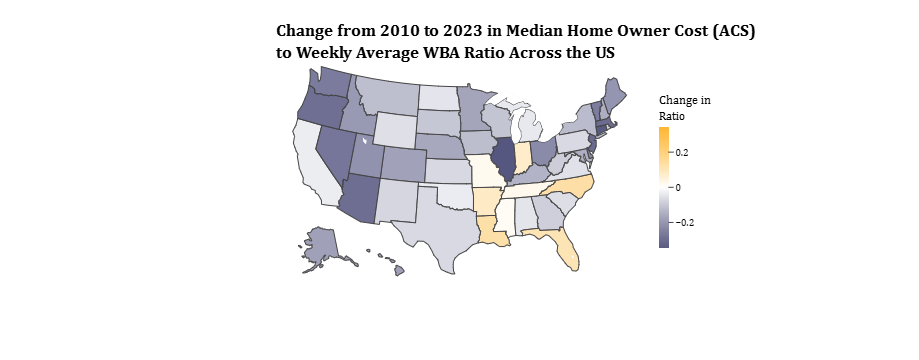

In [112]:
fig = px.choropleth(
    data_frame=housing,
    locations='State',               
    locationmode='USA-states',       
    color='Change in Avg WBA-Median Housing Ratio',                   
    color_continuous_scale= colorscale3,
    color_continuous_midpoint=0,
    scope='usa',                      
)

fig.update_layout(
    title={
        'text': "<b>Change from 2010 to 2023 in Median Home Owner Cost (ACS) <br>to Weekly Average WBA Ratio Across the US </b>",
        'x': 0.3,
        'y': 0.9,
        'xanchor': 'left'
    },
    font=dict(
        family="Cambria",  
        size=12,         
        color="black",
    ),
    coloraxis_colorbar=dict(
        title='Change in <br>Ratio',
        x=0.75,            
        len=0.8,           
        thickness=10,      
        ticks='outside',
        tickfont=dict(size=10),
    )
)

fig.show()

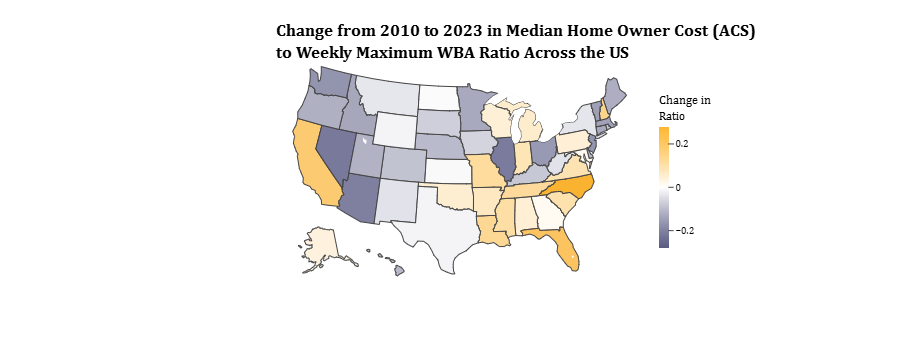

In [113]:
fig = px.choropleth(
    data_frame=housing,
    locations='State',               
    locationmode='USA-states',       
    color='Change in Max WBA-Median Housing Ratio',                   
    color_continuous_scale= colorscale3,
    color_continuous_midpoint=0,
    scope='usa',                      
)

fig.update_layout(
    title={
        'text': "<b>Change from 2010 to 2023 in Median Home Owner Cost (ACS) <br>to Weekly Maximum WBA Ratio Across the US </b>",
        'x': 0.3,
        'y': 0.9,
        'xanchor': 'left'
    },
    font=dict(
        family="Cambria",  
        size=12,         
        color="black",
    ),
    coloraxis_colorbar=dict(
        title='Change in <br>Ratio',
        x=0.75,            
        len=0.8,           
        thickness=10,      
        ticks='outside',
        tickfont=dict(size=10),
    )
)

fig.show()

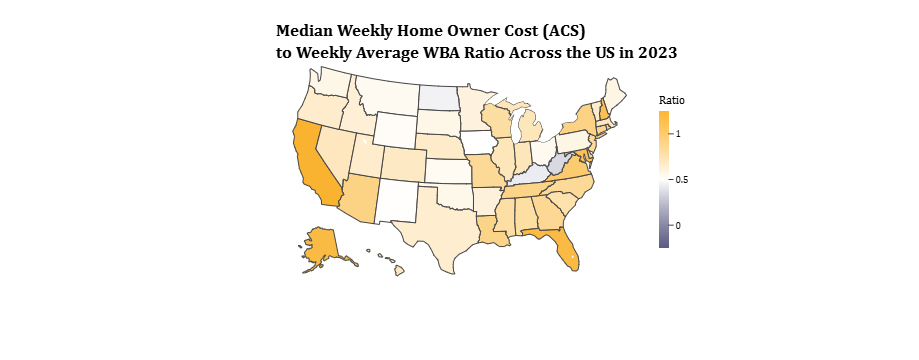

In [128]:
fig = px.choropleth(
    data_frame=housing,
    locations='State',               
    locationmode='USA-states',       
    color='Avg WBA-Median Housing Ratio_y',                   
    color_continuous_scale= colorscale3,
    color_continuous_midpoint=0.5,
    range_color=[-0.25, 1.25],
    scope='usa',                      
)

fig.update_layout(
    title={
        'text': "<b>Median Weekly Home Owner Cost (ACS) <br>to Weekly Average WBA Ratio Across the US in 2023</b>",
        'x': 0.3,
        'y': 0.9,
        'xanchor': 'left'
    },
    font=dict(
        family="Cambria",  
        size=12,         
        color="black",
    ),
    coloraxis_colorbar=dict(
        title='Ratio',
        x=0.75,            
        len=0.8,           
        thickness=10,      
        ticks='outside',
        tickfont=dict(size=10),
    )
)

fig.show()

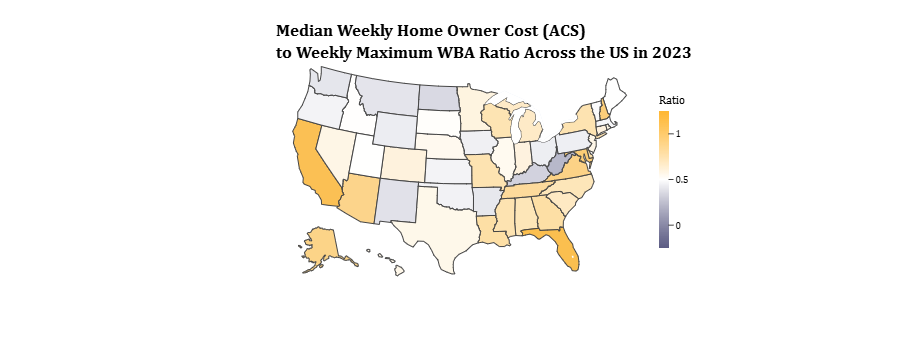

In [127]:
fig = px.choropleth(
    data_frame=housing,
    locations='State',               
    locationmode='USA-states',       
    color='Max WBA-Median Housing Ratio_y',                   
    color_continuous_scale= colorscale3,
    color_continuous_midpoint=0.5,
    range_color=[-0.25, 1.25],
    scope='usa',                      
)

fig.update_layout(
    title={
        'text': "<b>Median Weekly Home Owner Cost (ACS) <br>to Weekly Maximum WBA Ratio Across the US in 2023</b>",
        'x': 0.3,
        'y': 0.9,
        'xanchor': 'left'
    },
    font=dict(
        family="Cambria",  
        size=12,         
        color="black",
    ),
    coloraxis_colorbar=dict(
        title='Ratio',
        x=0.75,            
        len=0.8,           
        thickness=10,      
        ticks='outside',
        tickfont=dict(size=10),
    )
)

fig.show()

## Fig 8: Changes in Real Maximum WBA for states that index to weekly wages vs those that do not